###### Name:- Mansi Nagpal
Email:- mansinagpal786@gmail.com

Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
import numpy as np
import pandas as pd
import scipy.stats 
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


###### Now,I've uploaded the CSV file of Loan Application Status Prediction and made a dataframe for the same.
In this dataset I've to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. Since 'Loan_Status' is in the form of categorical String format so will use classification model

Exploratory Data Analysis(EDA)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
474,LP002524,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y


In [7]:
print('The Shape is',df.shape)
print('Total Rows are',df.shape[0])
print('Total Columns are',df.shape[1])

The Shape is (614, 13)
Total Rows are 614
Total Columns are 13


In [9]:
df.ndim

2

In [10]:
df.size

7982

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Categorical attributes=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
Categorical columns=8

Numeric attributes=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
Numeric columns= 5

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.isnull().any().any()

True

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.isnull().sum().sum()

149

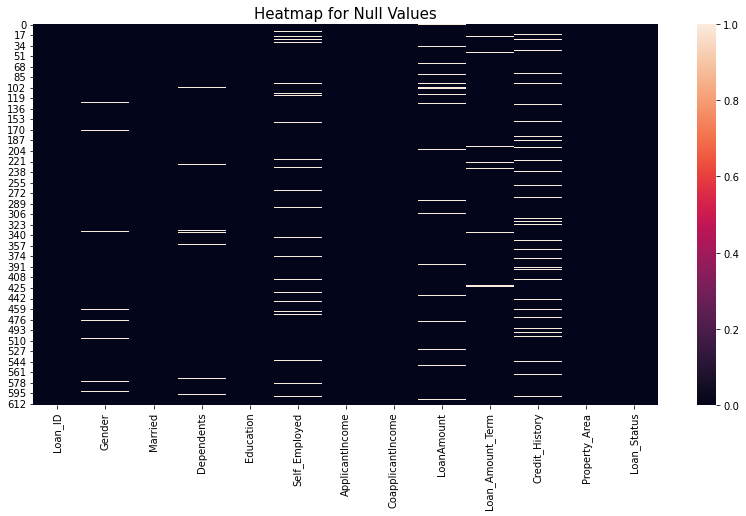

In [16]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull())
plt.title('Heatmap for Null Values',fontsize=15)
plt.show()

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
df.index

RangeIndex(start=0, stop=614, step=1)

In [19]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [20]:
for i in df.columns:
    print(f'The value counts for attribute {i} is-\n {df[i].value_counts()}')
    print('\n')

The value counts for attribute Loan_ID is-
 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


The value counts for attribute Gender is-
 Male      489
Female    112
Name: Gender, dtype: int64


The value counts for attribute Married is-
 Yes    398
No     213
Name: Married, dtype: int64


The value counts for attribute Dependents is-
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


The value counts for attribute Education is-
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


The value counts for attribute Self_Employed is-
 No     500
Yes     82
Name: Self_Employed, dtype: int64


The value counts for attribute ApplicantIncome is-
 2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


The 

###### The above output are representing the total counts of all the unique values for each attributes.
See we can refer the above output to know the count for each attributes,but What i can observe from the above output is like most of the attributes are containg '0' as an unique value and there counts are really high,so we need to replace it by mean of the respective columns as we can't drop it since the counts are really high and this can impact our result in the end.

##### Data Visualization
1.Countplot

The countplot for the attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


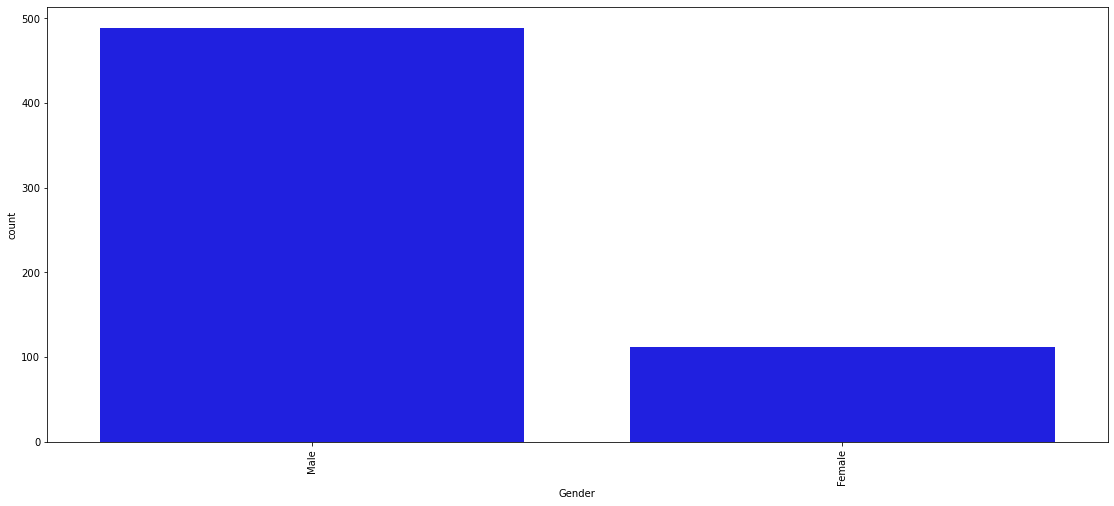



The countplot for the attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


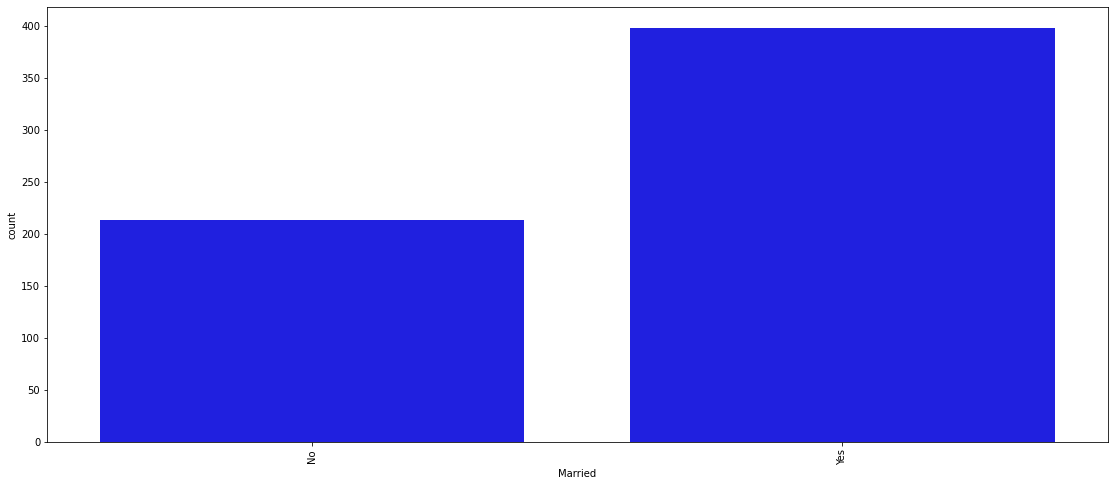



The countplot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


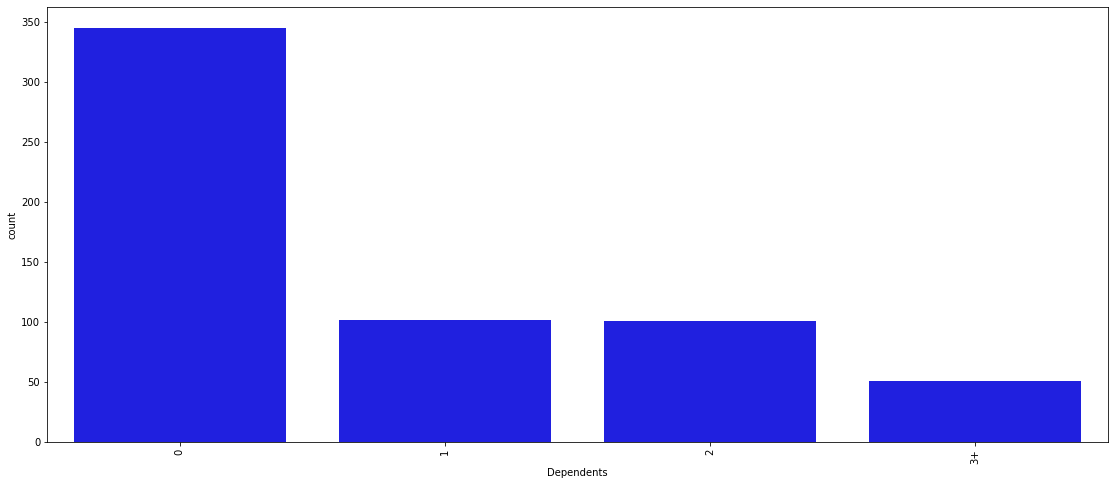



The countplot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


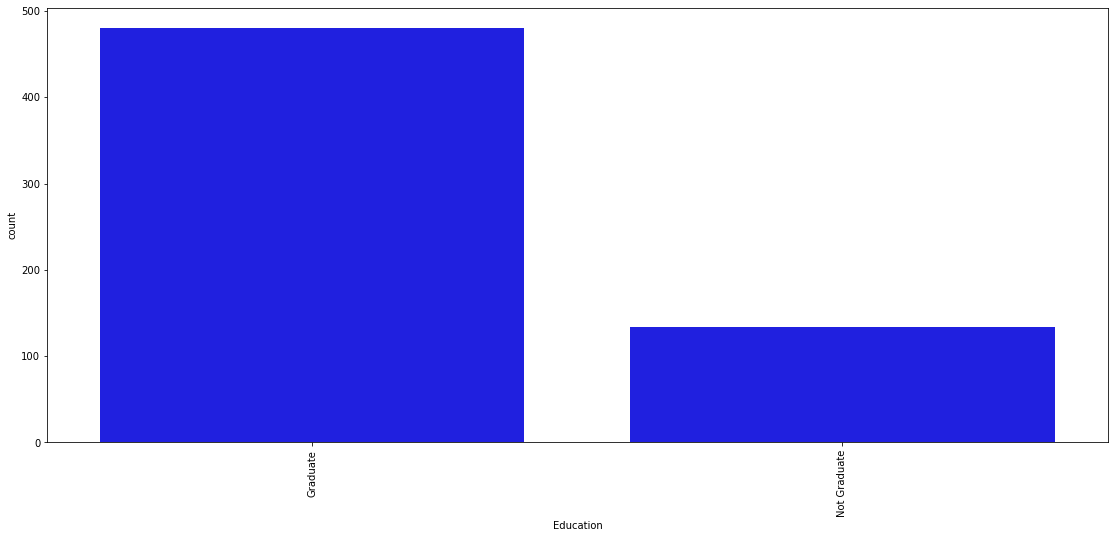



The countplot for the attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


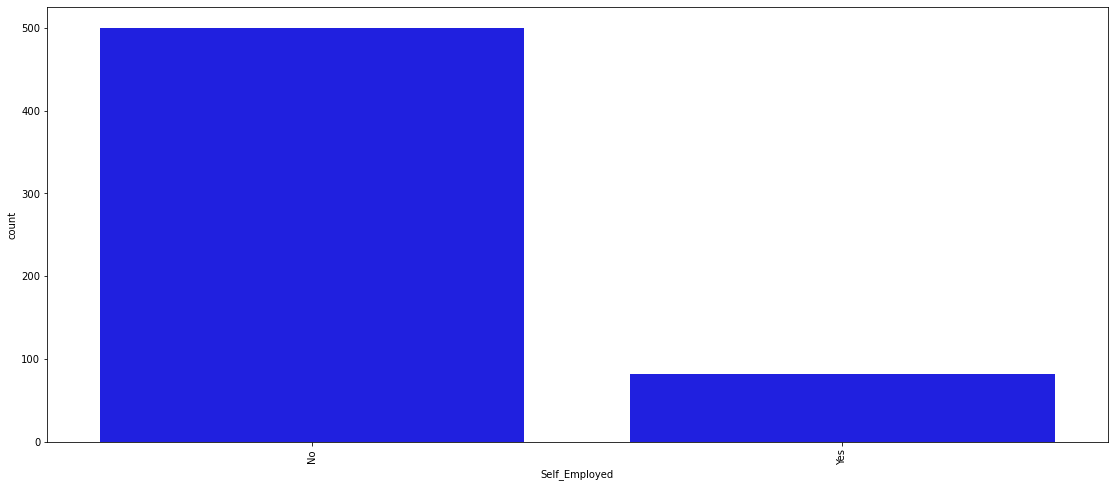



The countplot for the attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


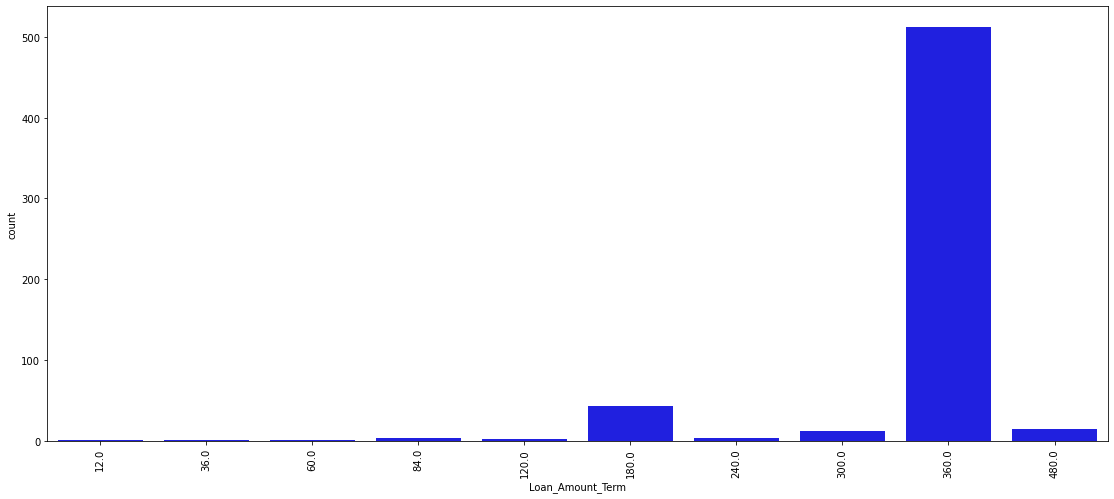



The countplot for the attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


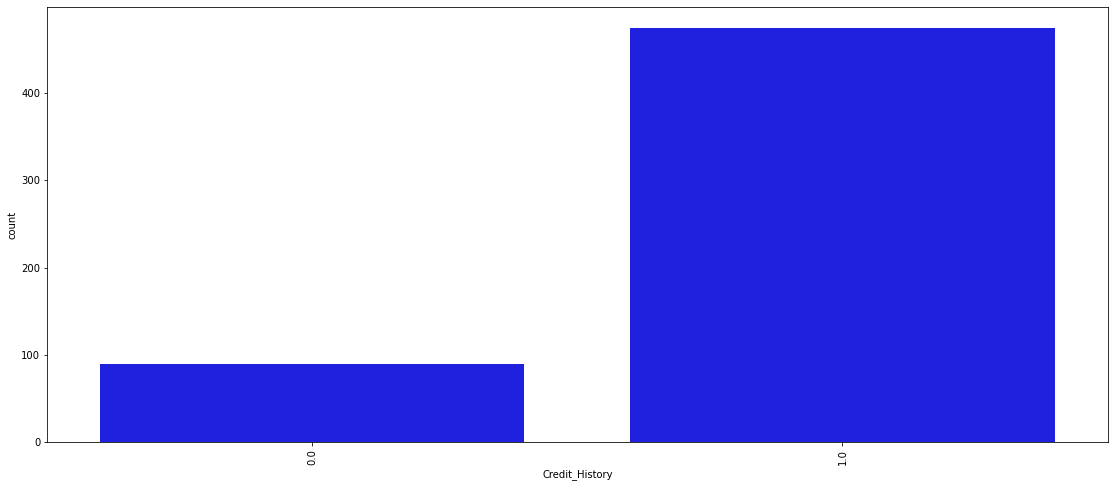



The countplot for the attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


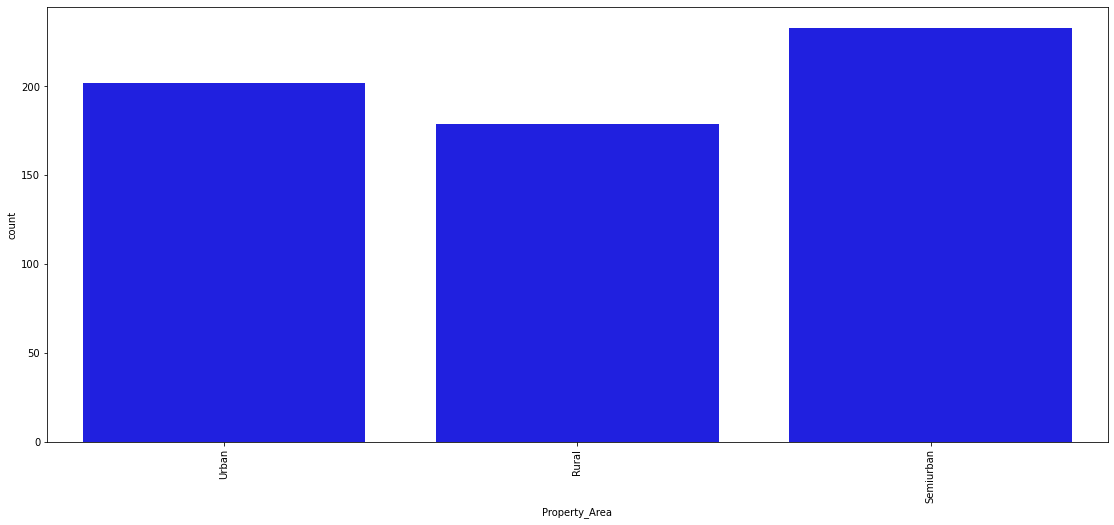



The countplot for the attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


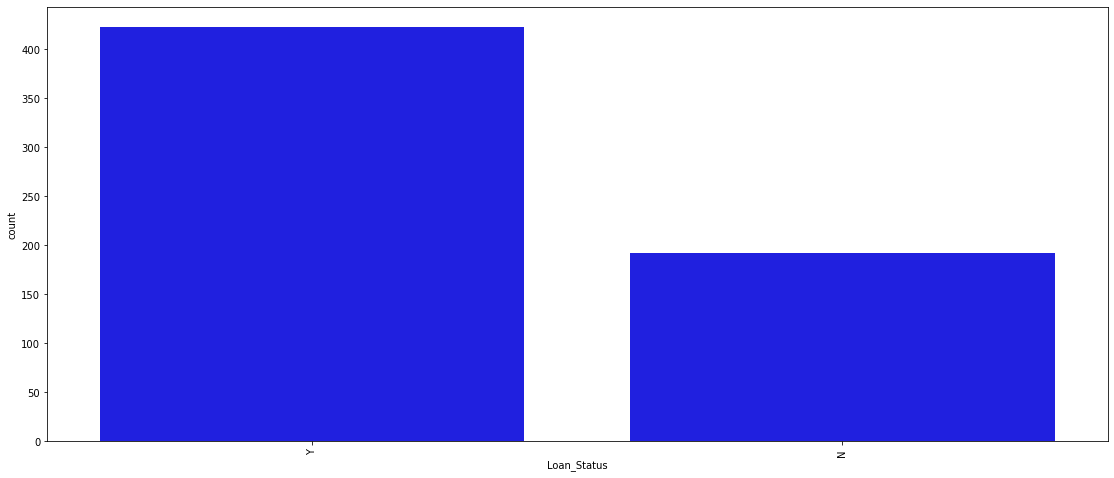

In [21]:
for i in df.columns.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount']):
    plt.figure(figsize=(19,8))
    print(f'The countplot for the attribute {i} is-\n {sns.countplot(df[i],color="BLUE")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### This plot basically do the counting of each unique values.
1.Out of 614 applicant approx 500 are males.

2.Approx 400 applicants are married.

3.Approx 350 applicants don't have any dependent.

4.Approx 500 applicants are graduate.

5.Out of 614 Approx 100 Applicants are self employed.

6.Approx 500 applicants has taken the loan amount tenure as 360 Months

7.More than 400 applicants has atleast taken one loan earlier

8.Approx 250 applicants belongs to semi-urban area.

9.Approx 450 applicants are approved for loan

##### Histogram

The Histogram Plot for the attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


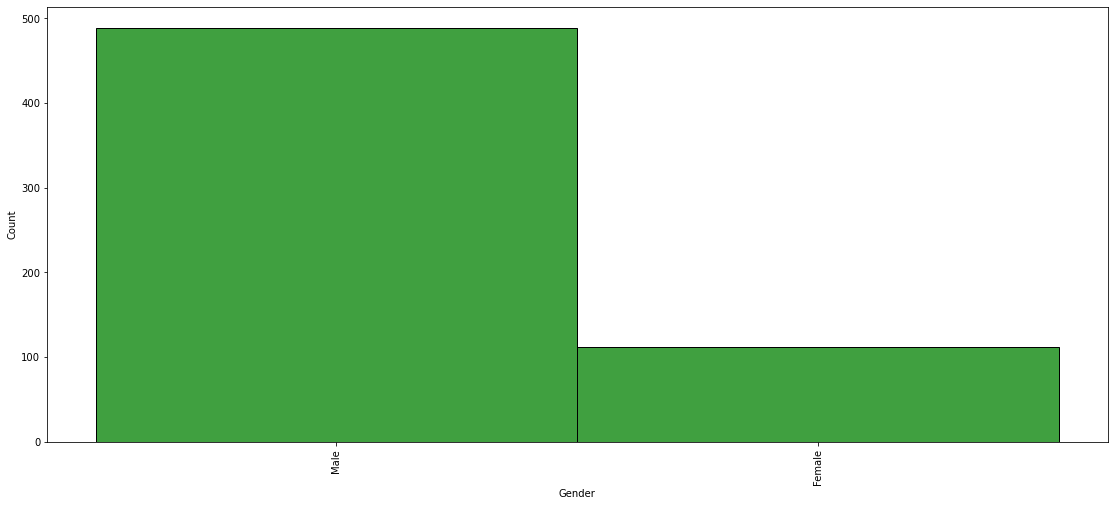



The Histogram Plot for the attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


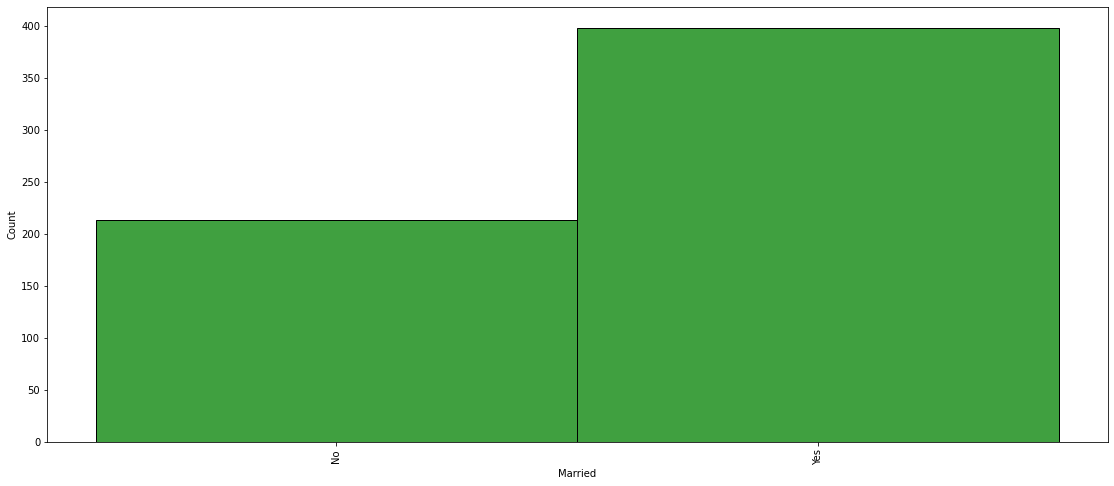



The Histogram Plot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


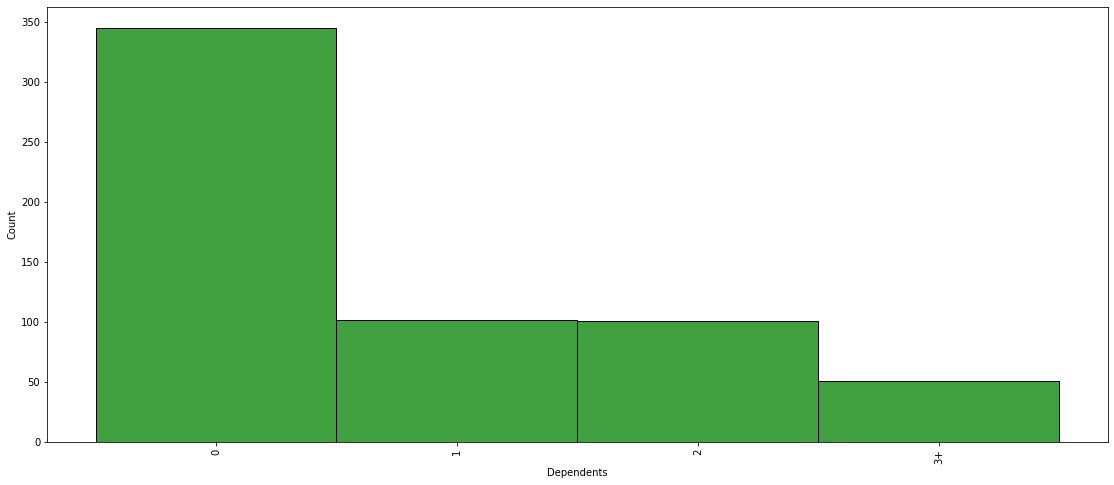



The Histogram Plot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


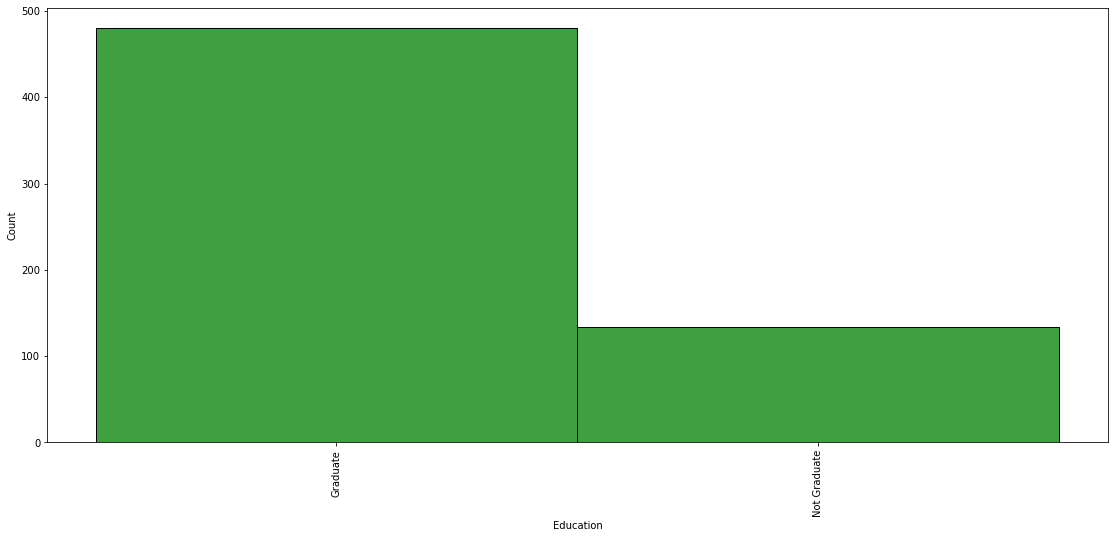



The Histogram Plot for the attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


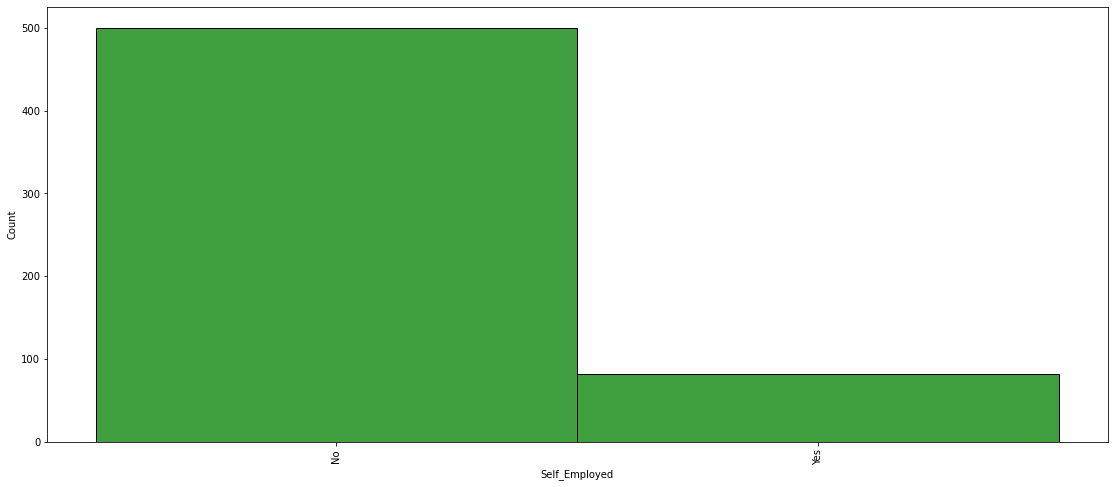



The Histogram Plot for the attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


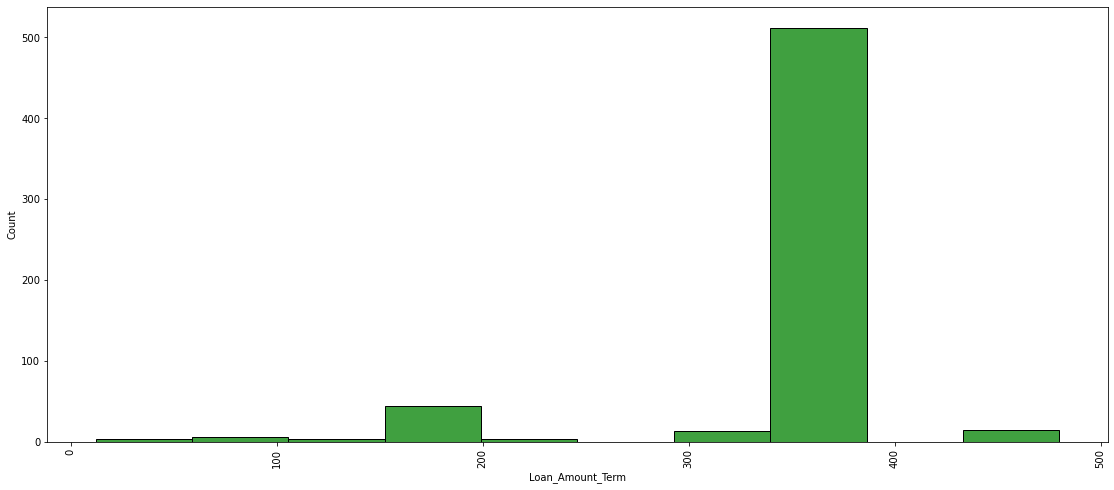



The Histogram Plot for the attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


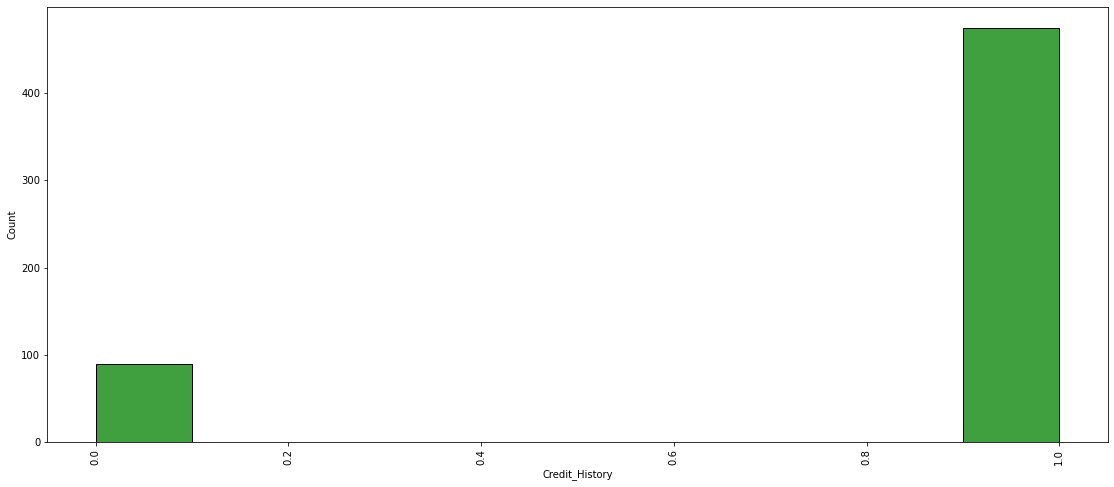



The Histogram Plot for the attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


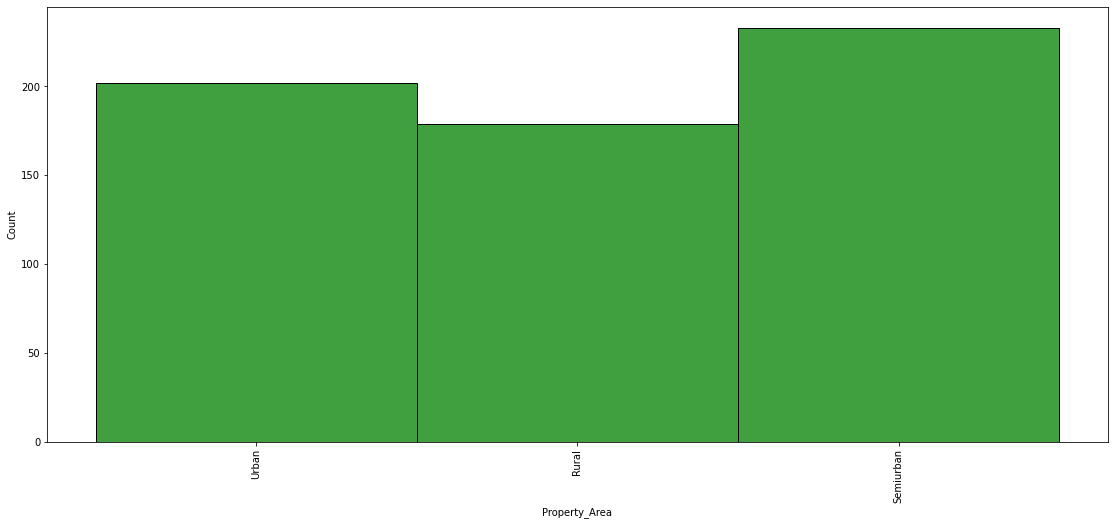



The Histogram Plot for the attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


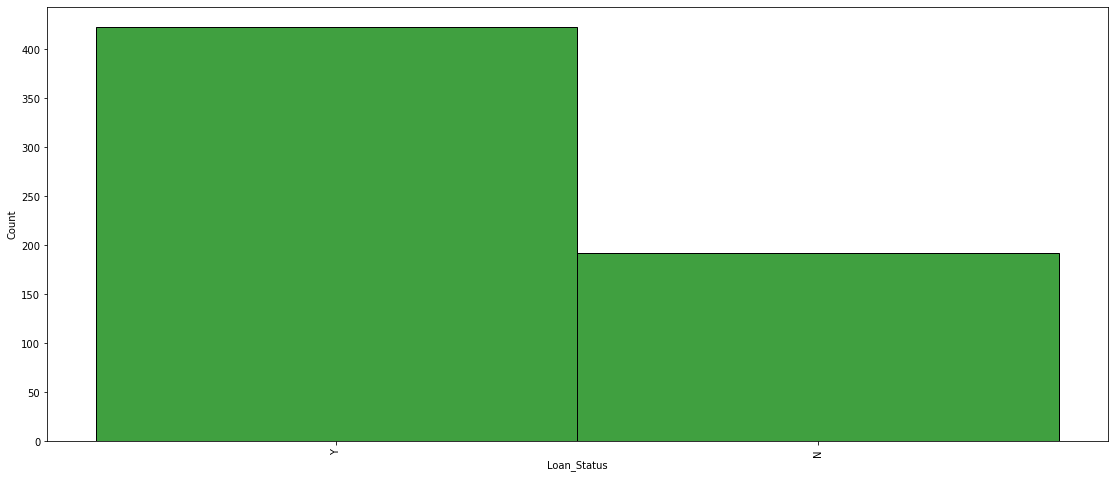

In [22]:
for i in df.columns.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount']):
    plt.figure(figsize=(19,8))
    print(f'The Histogram Plot for the attribute {i} is-\n {sns.histplot(df[i],color="green",bins=10)}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Graduate Male professionals who are working in a company,being married and belongs to the semi-urban area having least dependents in the family has applied for the loan in high numbers and most of the cases are approved for the loan.

##### Scatterplot

The Scatter Plot for the attribute "Loan_Status" & "Loan_ID" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


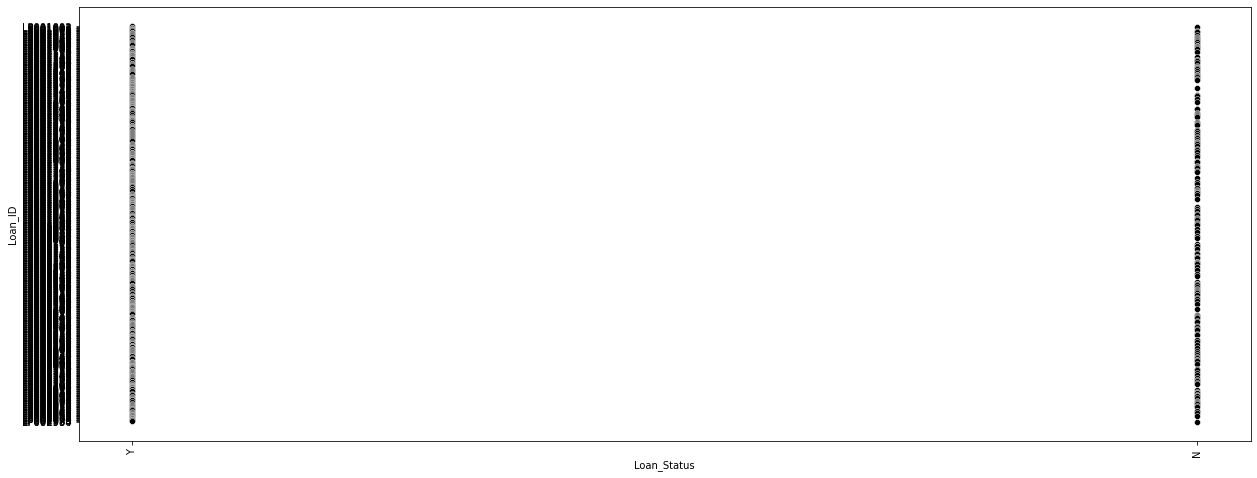



The Scatter Plot for the attribute "Loan_Status" & "Gender" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


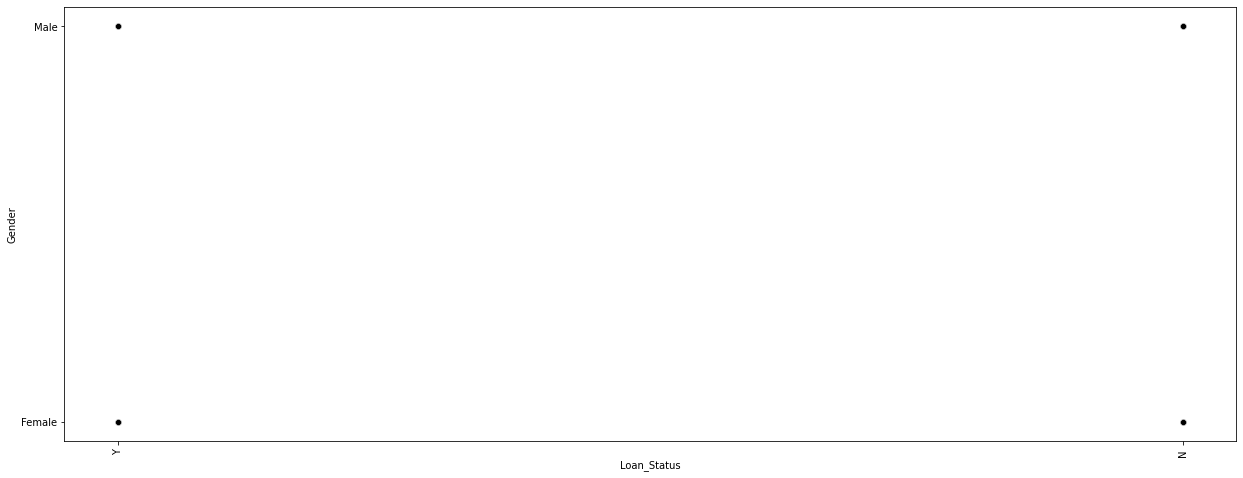



The Scatter Plot for the attribute "Loan_Status" & "Married" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


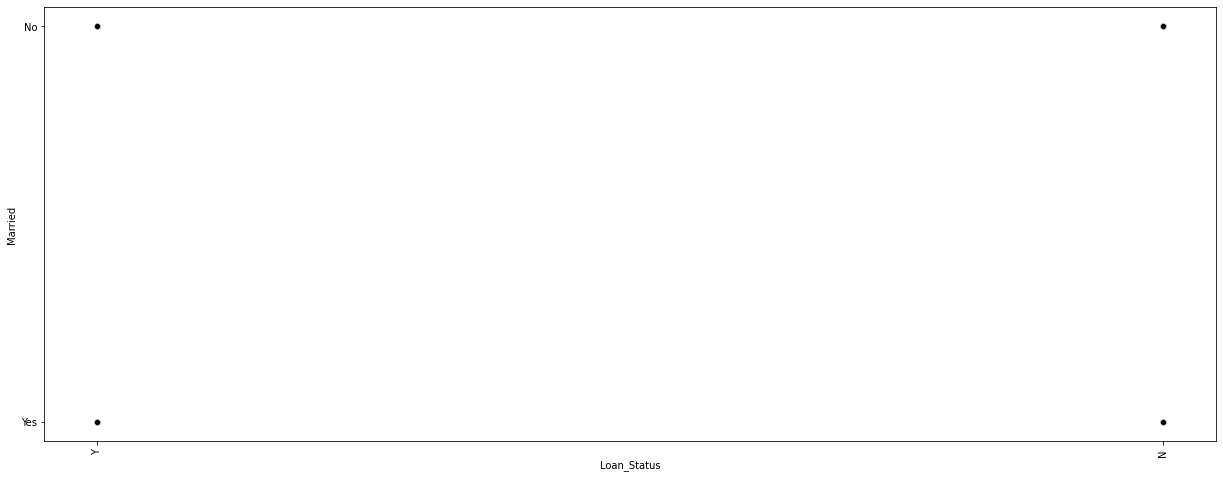



The Scatter Plot for the attribute "Loan_Status" & "Dependents" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


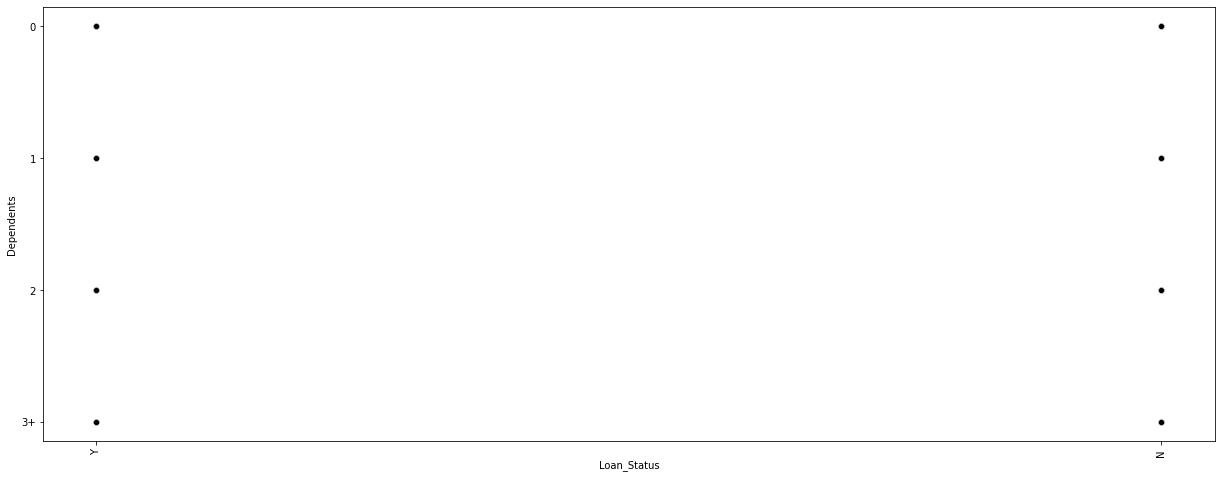



The Scatter Plot for the attribute "Loan_Status" & "Education" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


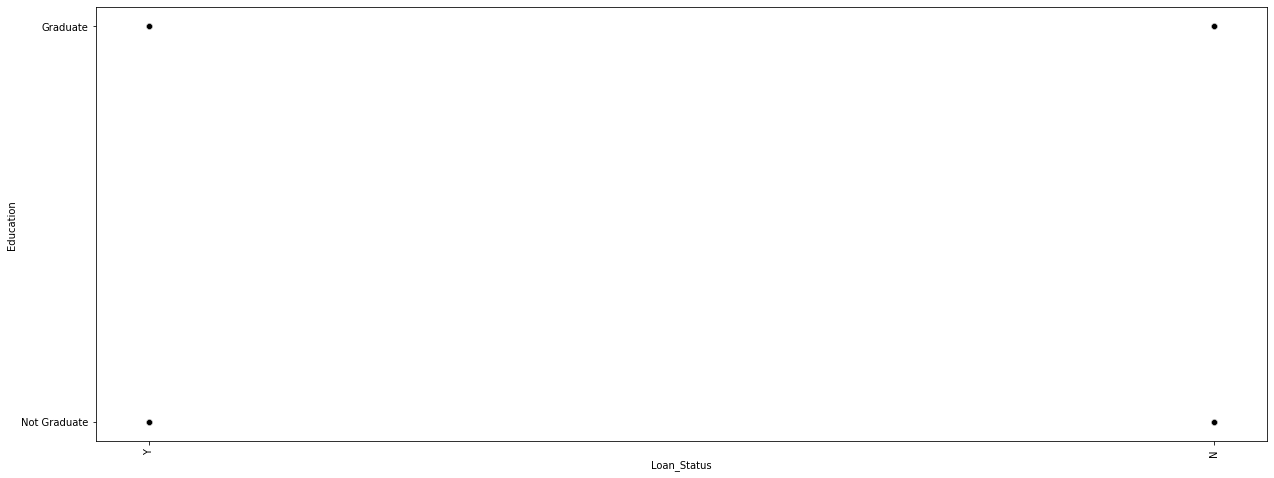



The Scatter Plot for the attribute "Loan_Status" & "Self_Employed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


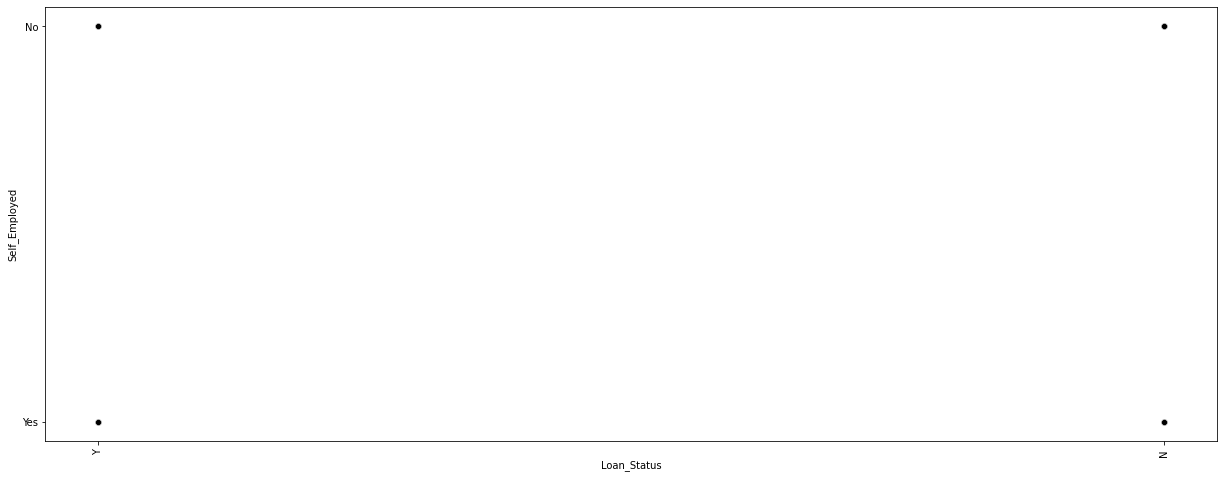



The Scatter Plot for the attribute "Loan_Status" & "ApplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


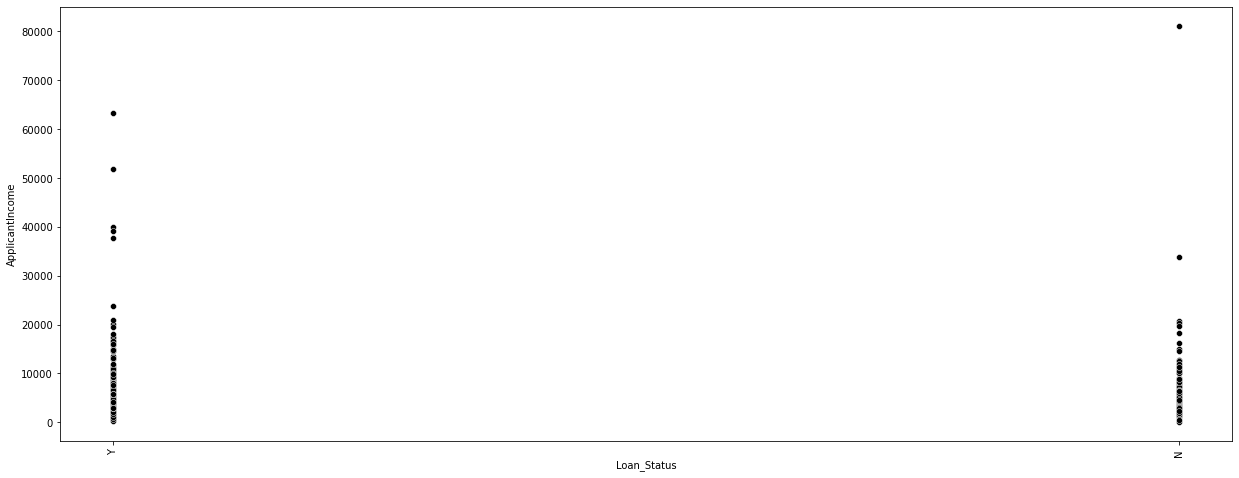



The Scatter Plot for the attribute "Loan_Status" & "CoapplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


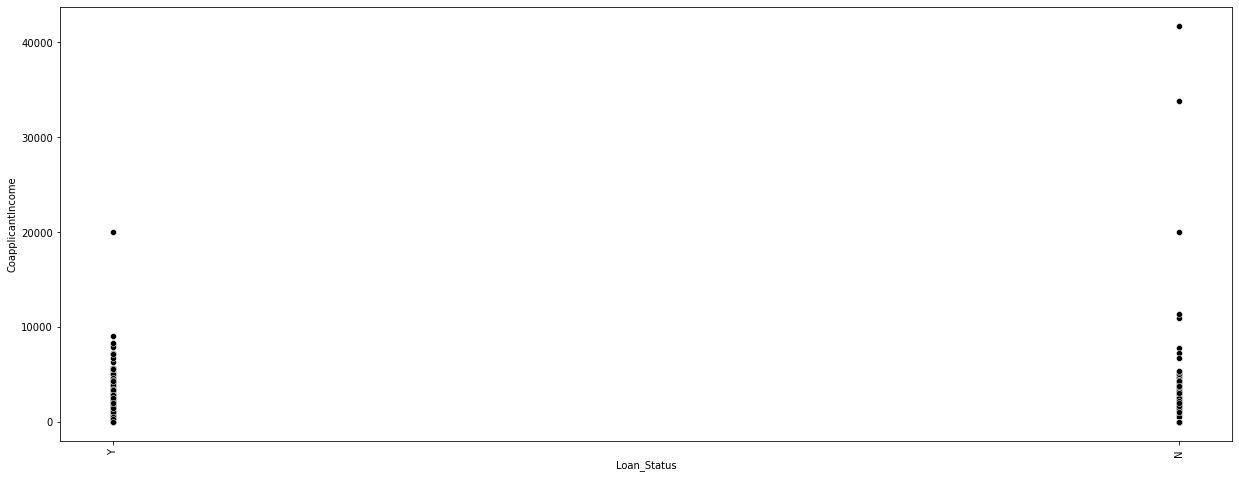



The Scatter Plot for the attribute "Loan_Status" & "LoanAmount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


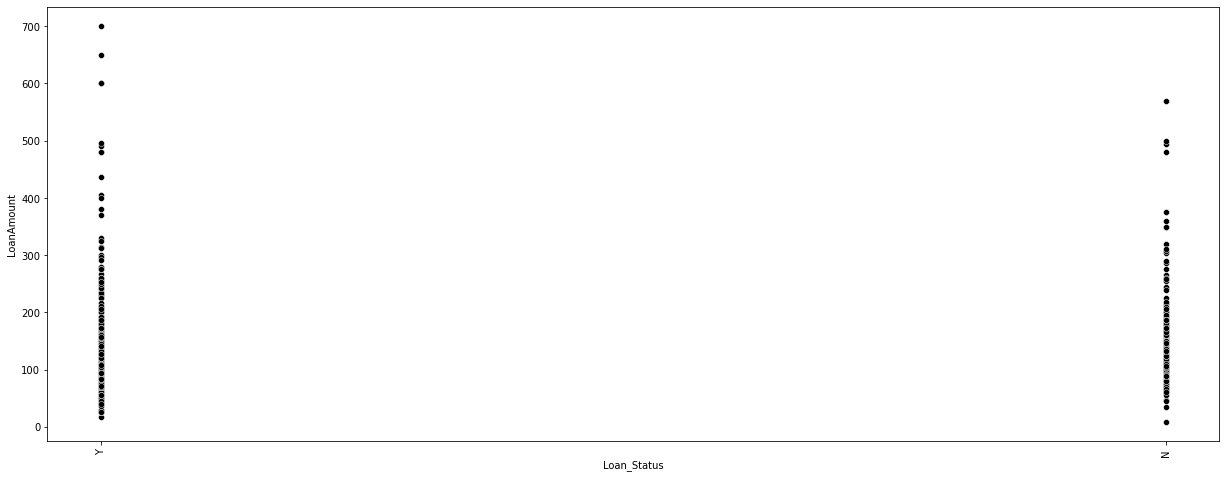



The Scatter Plot for the attribute "Loan_Status" & "Loan_Amount_Term" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


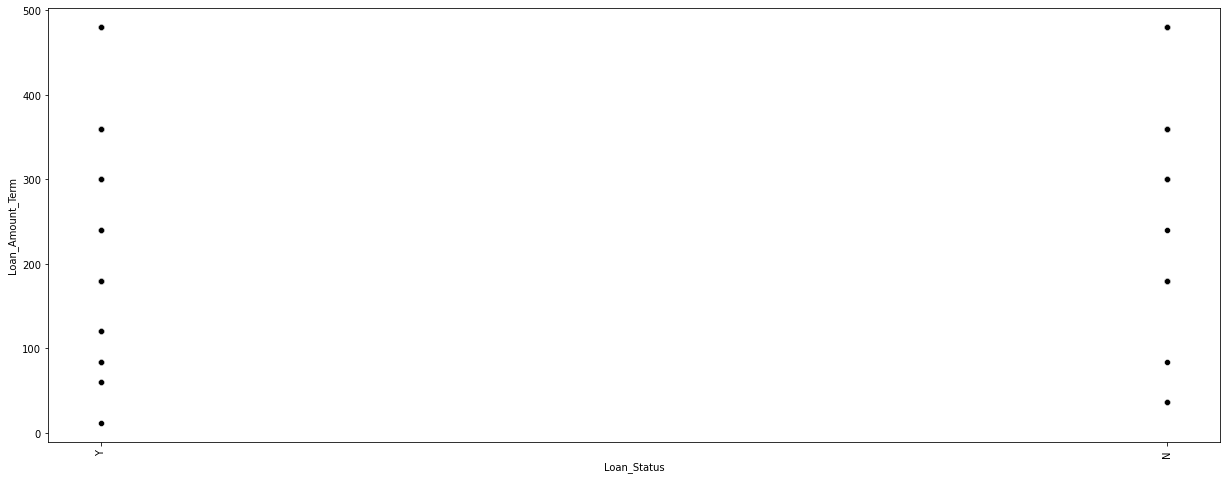



The Scatter Plot for the attribute "Loan_Status" & "Credit_History" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


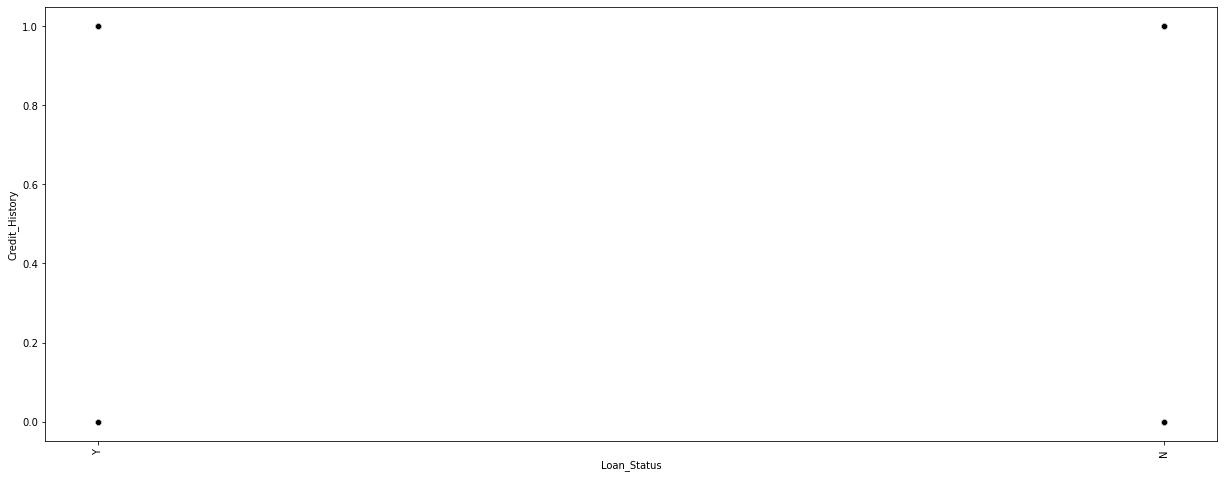



The Scatter Plot for the attribute "Loan_Status" & "Property_Area" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


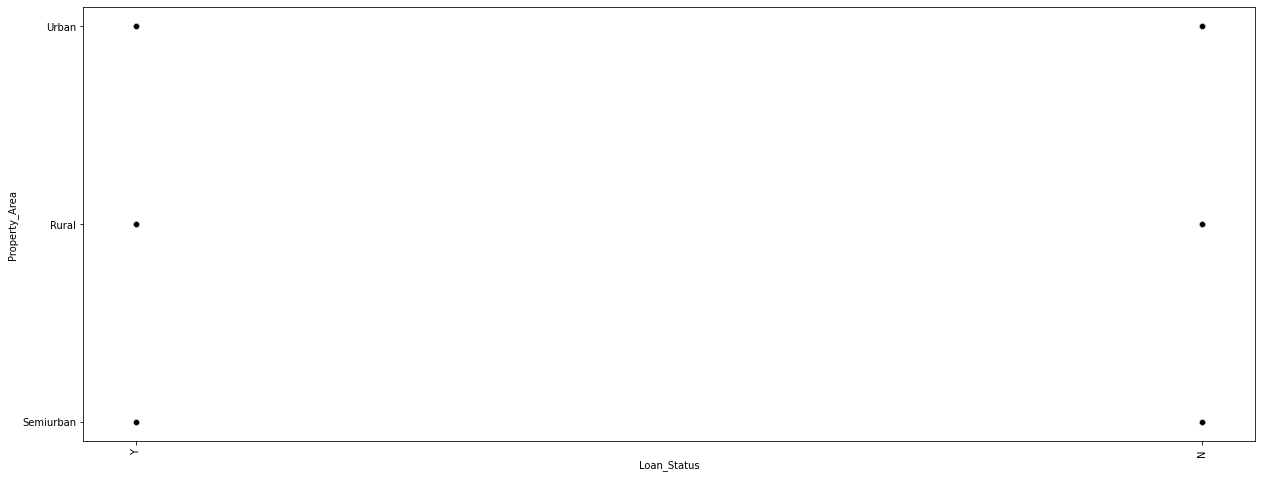



The Scatter Plot for the attribute "Loan_Status" & "Loan_Status" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


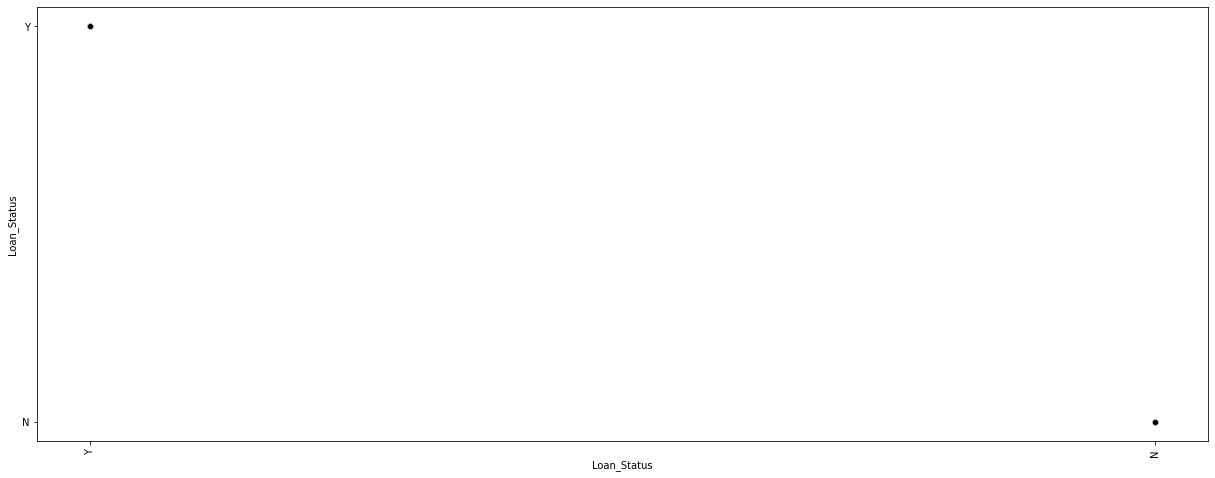

In [23]:
for i in df.columns:
    plt.figure(figsize=(21,8))
    print(f'The Scatter Plot for the attribute "Loan_Status" & "{i}" is-\n {sns.scatterplot(df.Loan_Status,df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### Lineplot

The Line Plot for the attribute "Loan_Status" & "Loan_ID" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


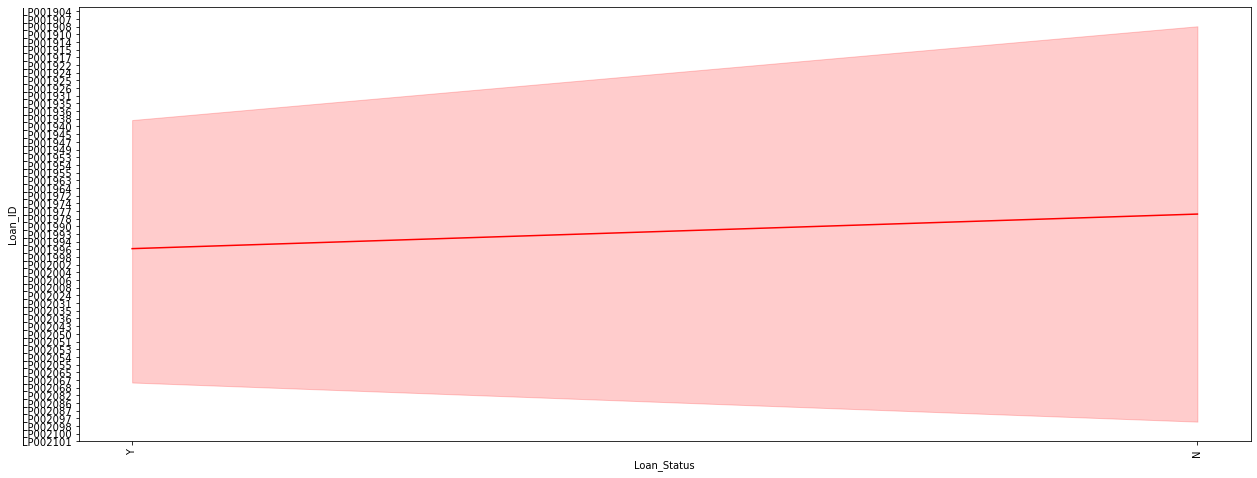



The Line Plot for the attribute "Loan_Status" & "Gender" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


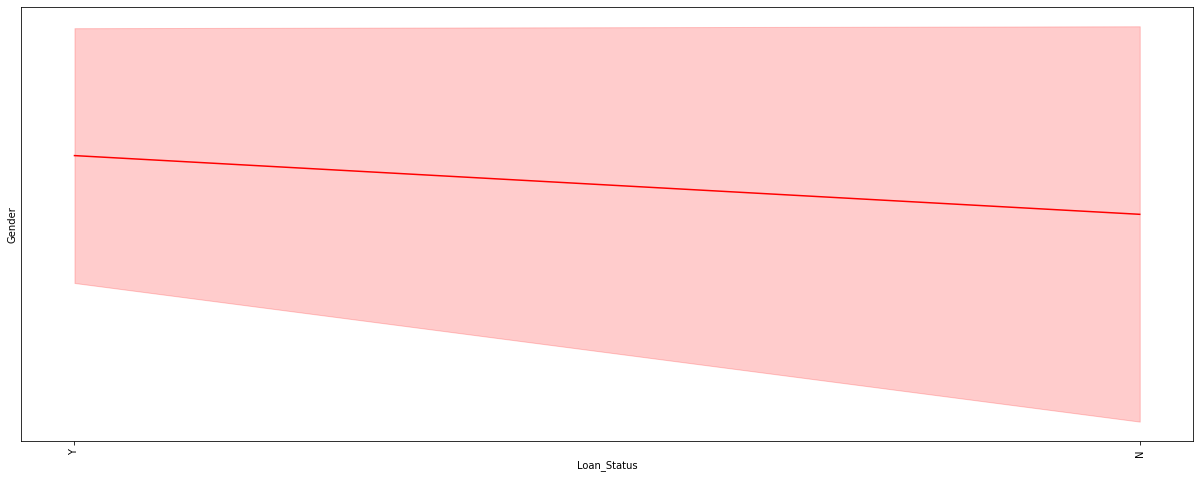



The Line Plot for the attribute "Loan_Status" & "Married" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


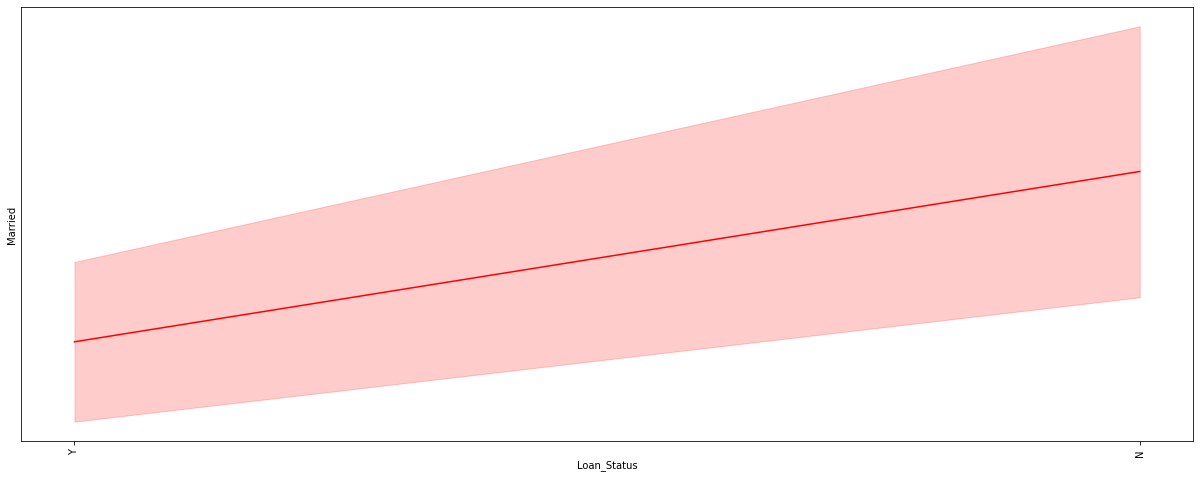



The Line Plot for the attribute "Loan_Status" & "Dependents" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


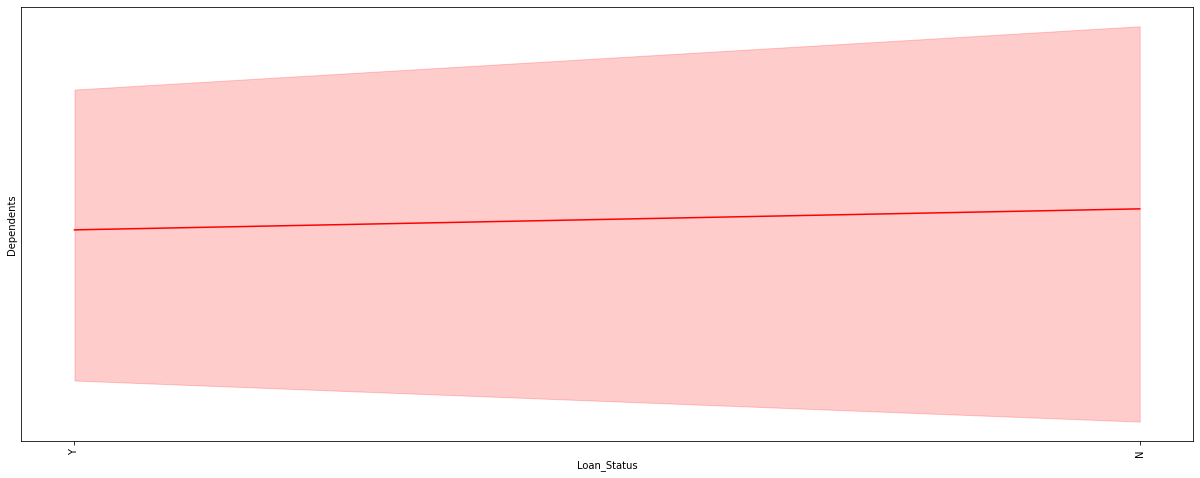



The Line Plot for the attribute "Loan_Status" & "Education" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


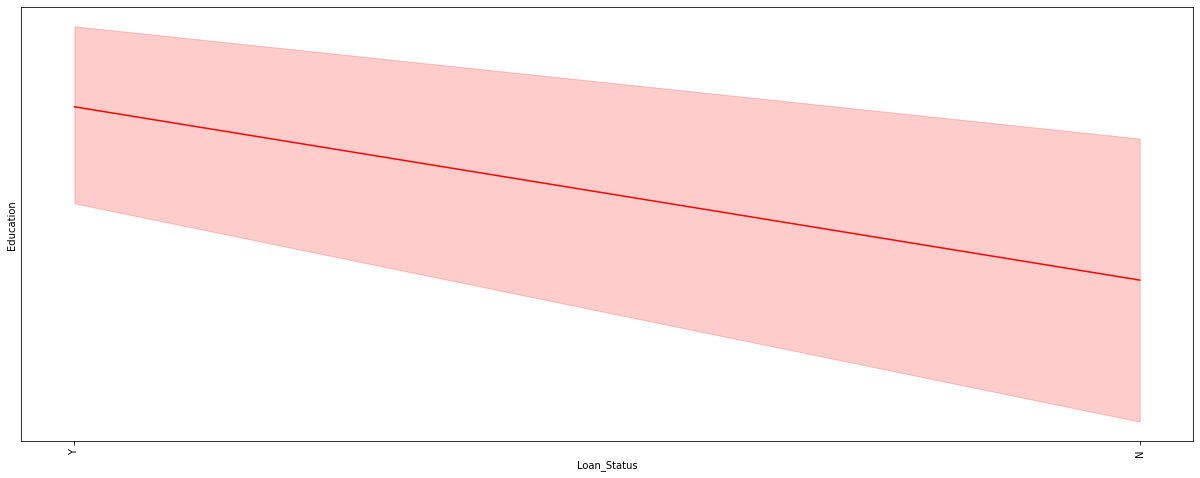



The Line Plot for the attribute "Loan_Status" & "Self_Employed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


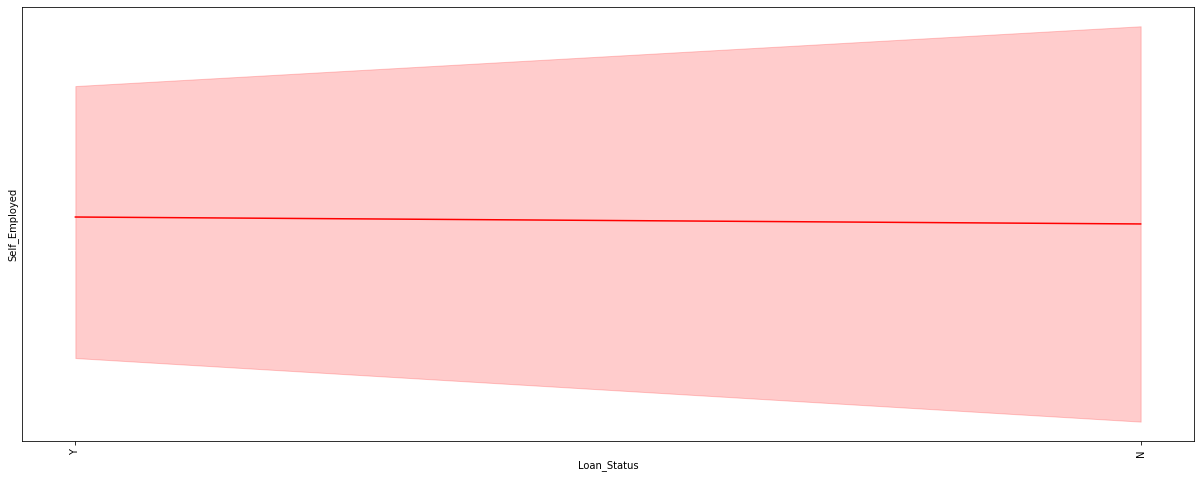



The Line Plot for the attribute "Loan_Status" & "ApplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


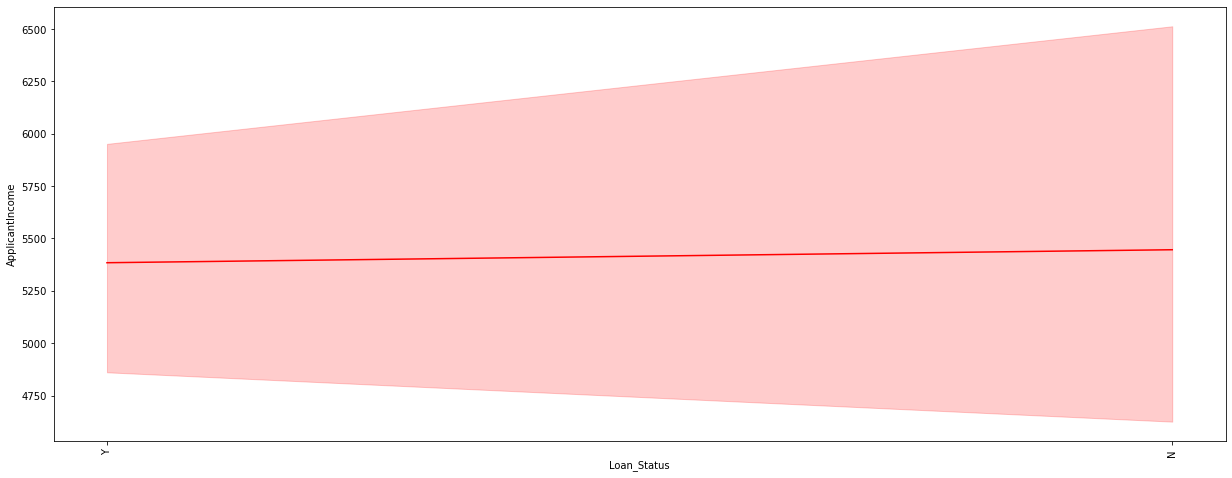



The Line Plot for the attribute "Loan_Status" & "CoapplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


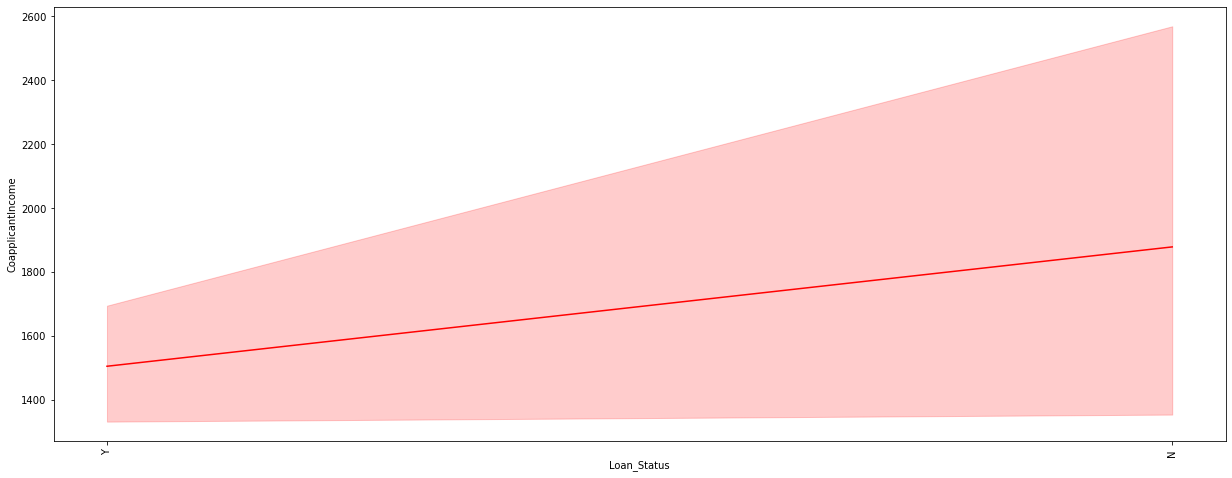



The Line Plot for the attribute "Loan_Status" & "LoanAmount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


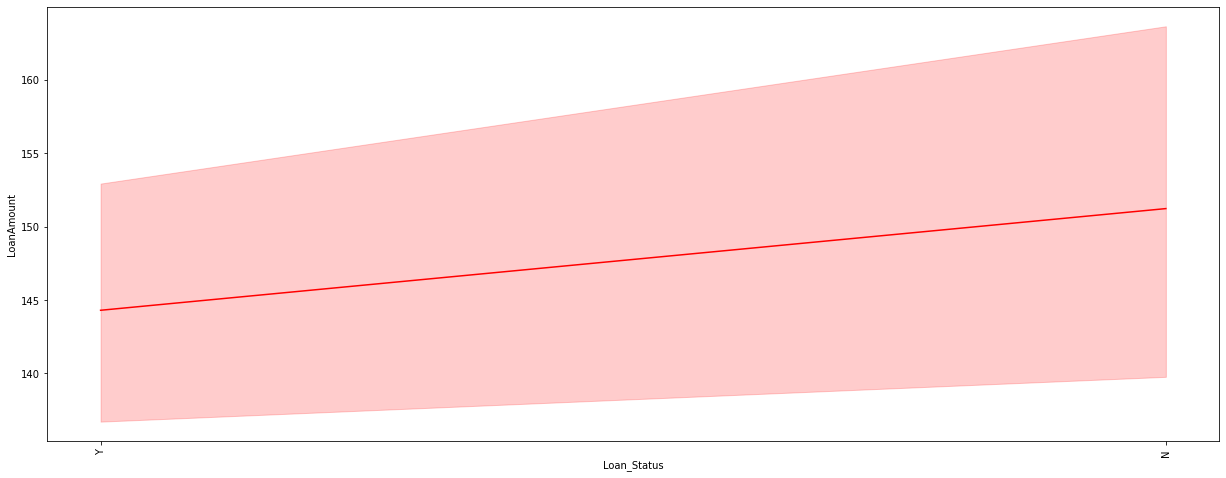



The Line Plot for the attribute "Loan_Status" & "Loan_Amount_Term" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


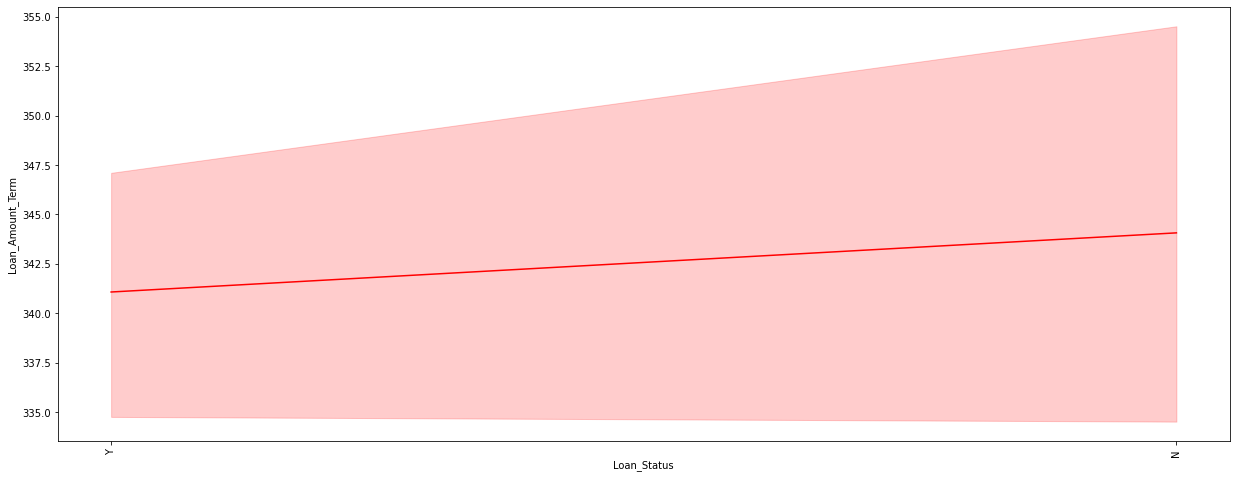



The Line Plot for the attribute "Loan_Status" & "Credit_History" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


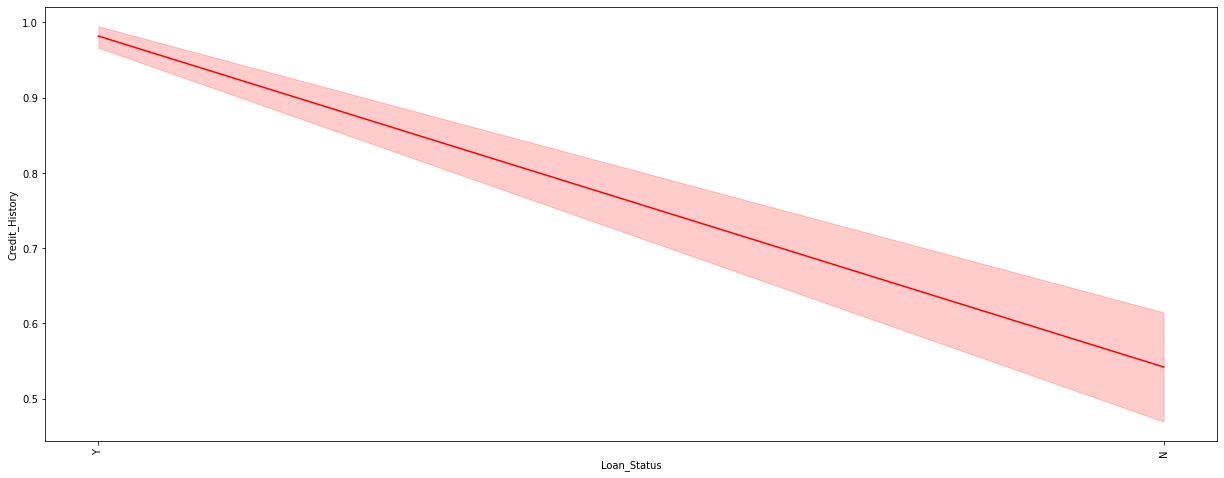



The Line Plot for the attribute "Loan_Status" & "Property_Area" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


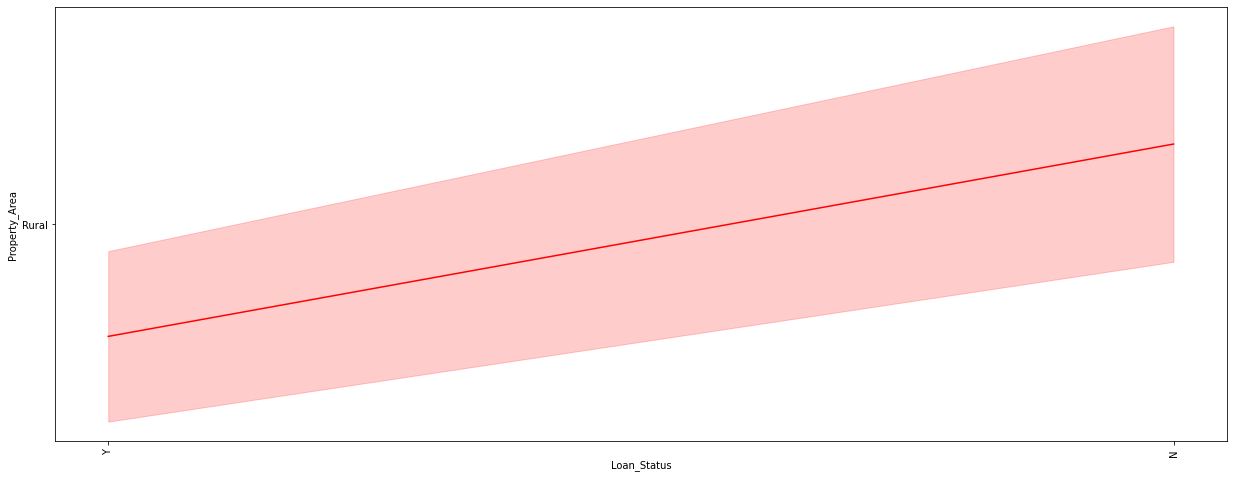



The Line Plot for the attribute "Loan_Status" & "Loan_Status" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


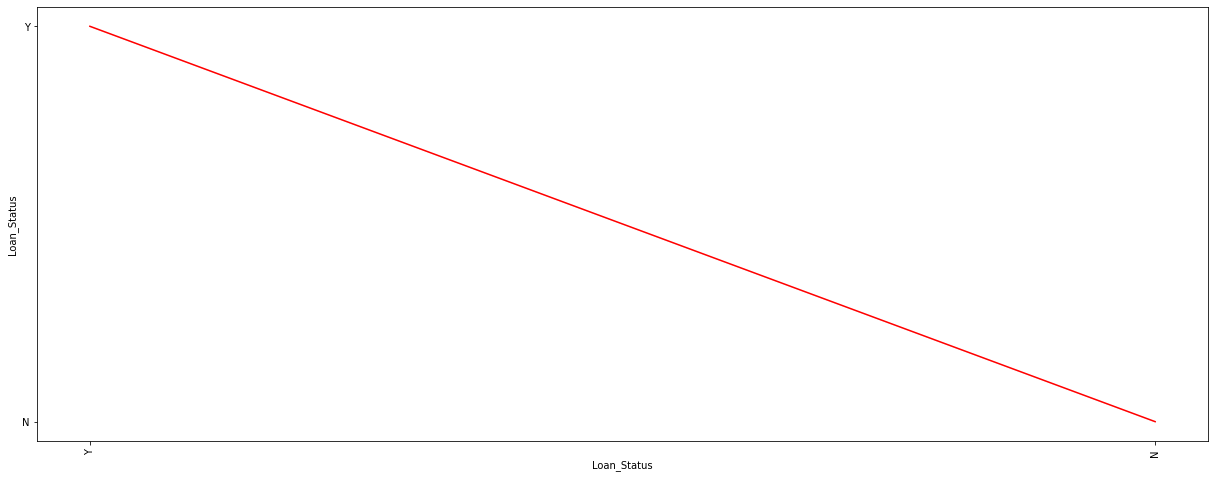

In [24]:
for i in df.columns:
    plt.figure(figsize=(21,8))
    print(f'The Line Plot for the attribute "Loan_Status" & "{i}" is-\n {sns.lineplot(df.Loan_Status,df[i],color="red")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### These graphs are showing the distribution trend w.r.t. target variable.

##### Categorial Plotting

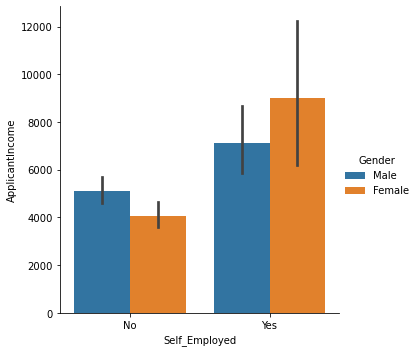

In [25]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',hue='Gender',data=df,kind='bar')
plt.show()

##### The female self_employed applicants who are applied for the loan has income around 9000

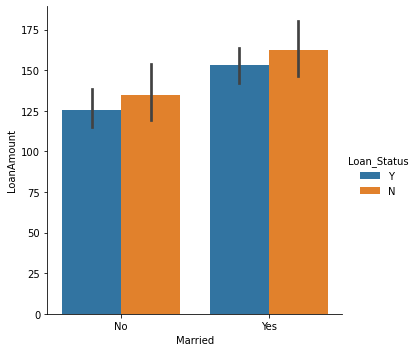

In [26]:
sns.catplot(x='Married',y='LoanAmount',hue='Loan_Status',data=df,kind='bar')
plt.show()

##### The married applicants who has applied for the loan amount approx 150 are approved for the loan whereas the married applicants who has applied for the loan amount approx 165 are not eligible for the loan

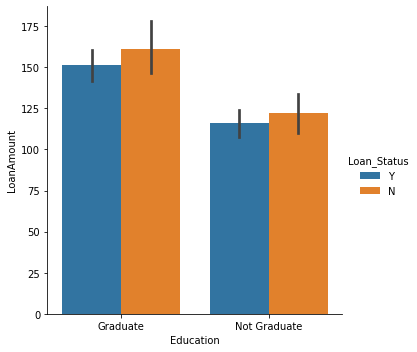

In [27]:
sns.catplot(x='Education',y='LoanAmount',hue='Loan_Status',data=df,kind='bar')
plt.show()

##### Most of the applicants who are graduate and applied for the loan amount approx 150 are approved for taking the loan where as if they apply above 160 they are not eligible for the loan

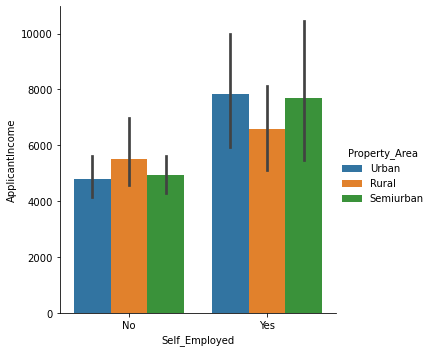

In [28]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',hue='Property_Area',data=df,kind='bar')
plt.show()

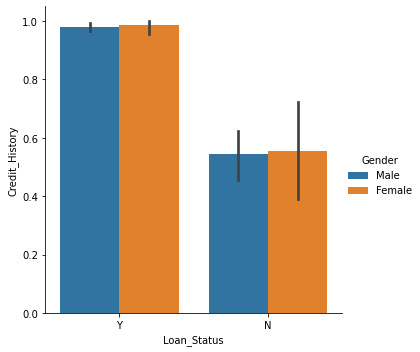

In [29]:
sns.catplot(x='Loan_Status',y='Credit_History',hue='Gender',data=df,kind='bar')
plt.show()

##### Those Male and female both the applicants who has atleast 1 credit history are eligible for the loan

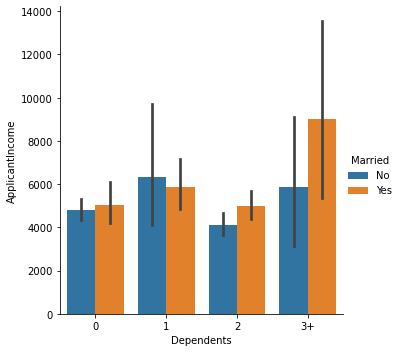

In [30]:
sns.catplot(x='Dependents',y='ApplicantIncome',hue='Married',data=df,kind='bar')
plt.show()

##### Applicant those are married and having three and above dependents in the family have income of more than 800

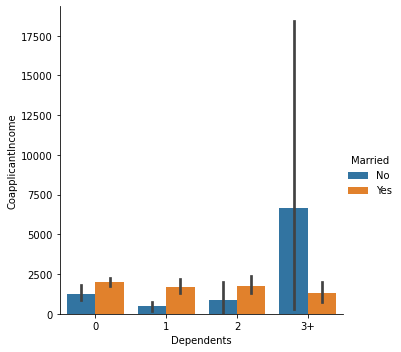

In [31]:
sns.catplot(x='Dependents',y='CoapplicantIncome',hue='Married',data=df,kind='bar')
plt.show()

##### Applicants those are not married and having three and above independents in the family,their coapplicant income is approx 6000

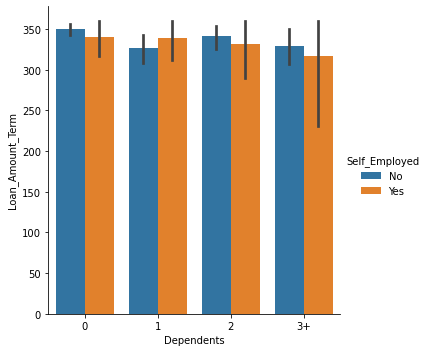

In [32]:
sns.catplot(x='Dependents',y='Loan_Amount_Term',hue='Self_Employed',data=df,kind='bar')
plt.show()

###### Applicants who are not self-employed and have no dependents in the family has taken loan tenure as approx 350Month

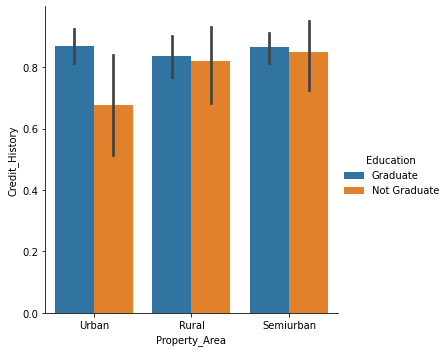

In [33]:
sns.catplot(x='Property_Area',y='Credit_History',hue='Education',data=df,kind='bar')
plt.show()

##### Applicants those are graduate and living in urban areas has credit history as 1 and they are eligible for loan in most of the cases

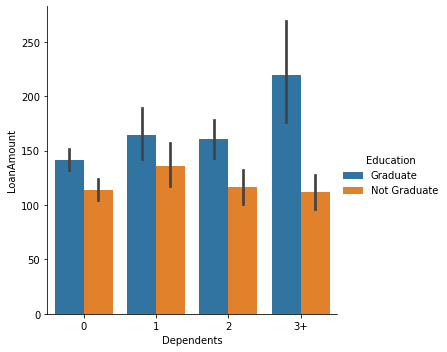

In [34]:
sns.catplot(x='Dependents',y='LoanAmount',hue='Education',data=df,kind='bar')
plt.show()

##### Graduate applicants having more than 3 dependents in the family has applied for the loan amount of approx 225

###### Replacing the Null Values and Zero's

In [35]:
import sklearn
from sklearn.impute import SimpleImputer

In [36]:
#these Categorical columns have null value presence hence will replace it by mode of the respective columns 
l=['Gender','Married','Dependents','Self_Employed']
for i in l:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

In [37]:
#these Numeric columns have null value presence hence will replace it by median of the respective columns 
l=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in l:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(df[i].values.reshape(-1,1))

In [38]:
df.isnull().sum().sum()

0

In [39]:
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean())

###### Encoding

###### Now I'll convert all the categorical columns into numeric one by applying label encoder technique
Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
p=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for u in p:
    df[u]=LabelEncoder().fit_transform(df[u].astype(str))

In [41]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,1621.245798,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,1621.245798,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,1621.245798,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,1621.245798,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,1621.245798,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.000000,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,1621.245798,187.0,360.0,1.0,2,1


##### Violinplot

The Violin-Plot for the attribute Loan_ID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


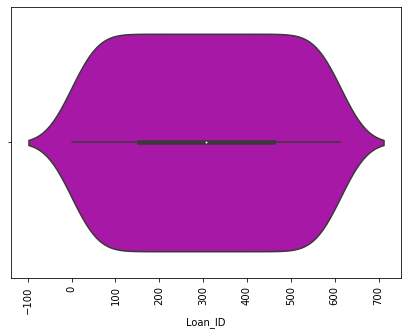



The Violin-Plot for the attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


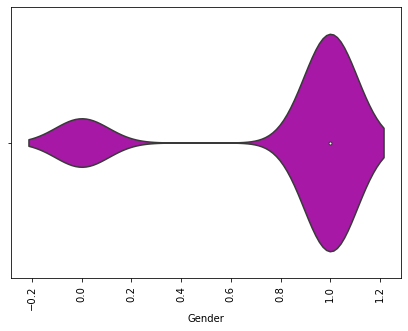



The Violin-Plot for the attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


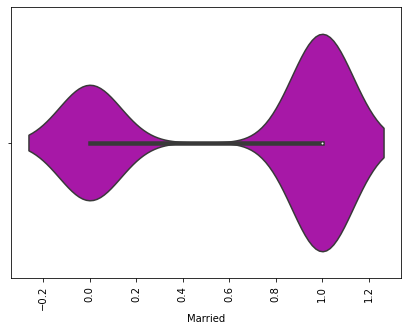



The Violin-Plot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


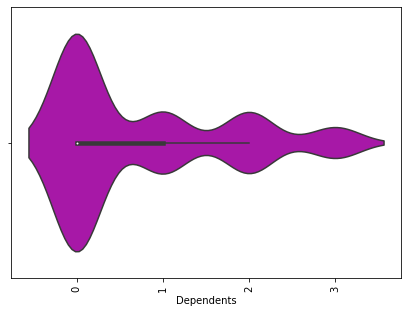



The Violin-Plot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


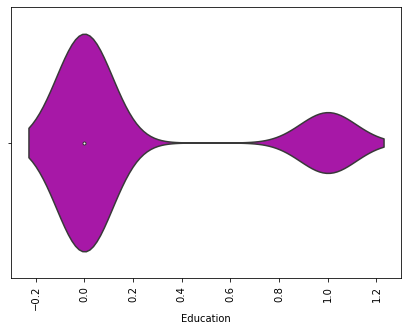



The Violin-Plot for the attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


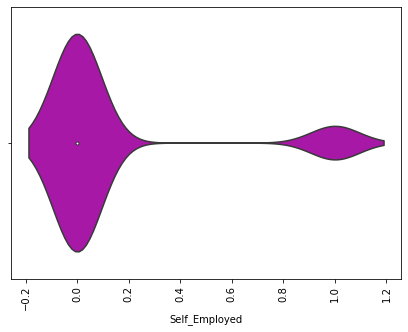



The Violin-Plot for the attribute ApplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


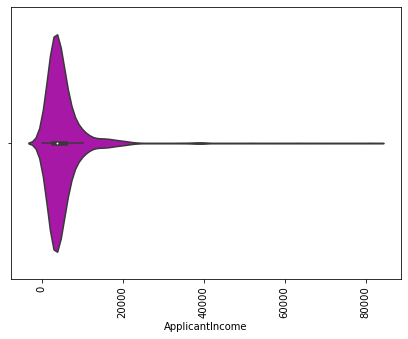



The Violin-Plot for the attribute CoapplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


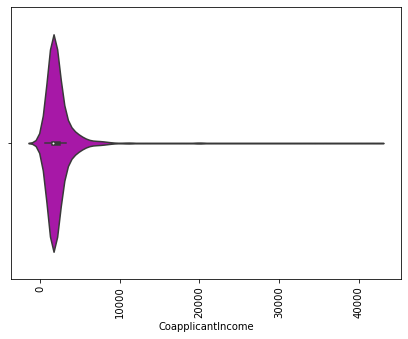



The Violin-Plot for the attribute LoanAmount is-
 AxesSubplot(0.125,0.125;0.775x0.755)


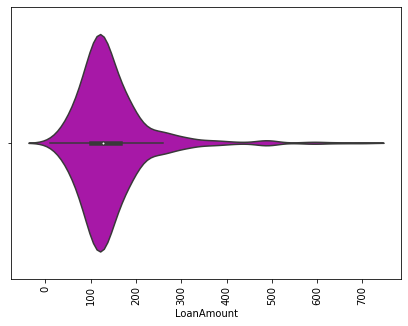



The Violin-Plot for the attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


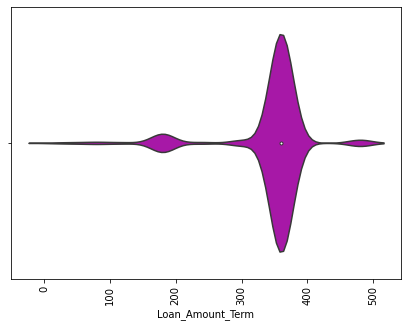



The Violin-Plot for the attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


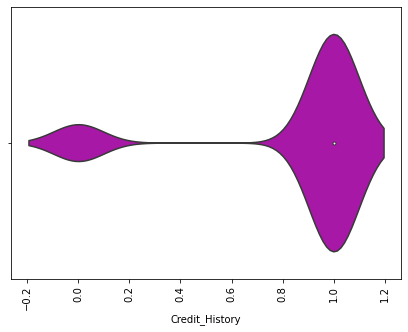



The Violin-Plot for the attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


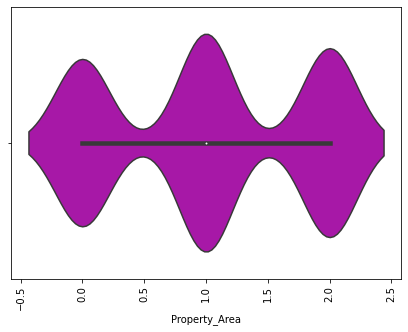



The Violin-Plot for the attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


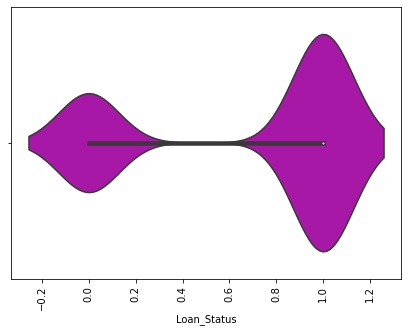

In [42]:
for i in df.columns:
    plt.figure(figsize=(7,5))
    print(f'The Violin-Plot for the attribute {i} is-\n {sns.violinplot(df[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### Violin plot basically indicates that what is the width of datapoints having most frequency.
As we can see in this plot we can say that most of the applicants have income range b/w (0-20000) and coapplicants income range in b/w (0-10000).
Most of the applicants are applying for the loan amount range b/w(100-200) and having tenure range (360-400)

##### Pairplot

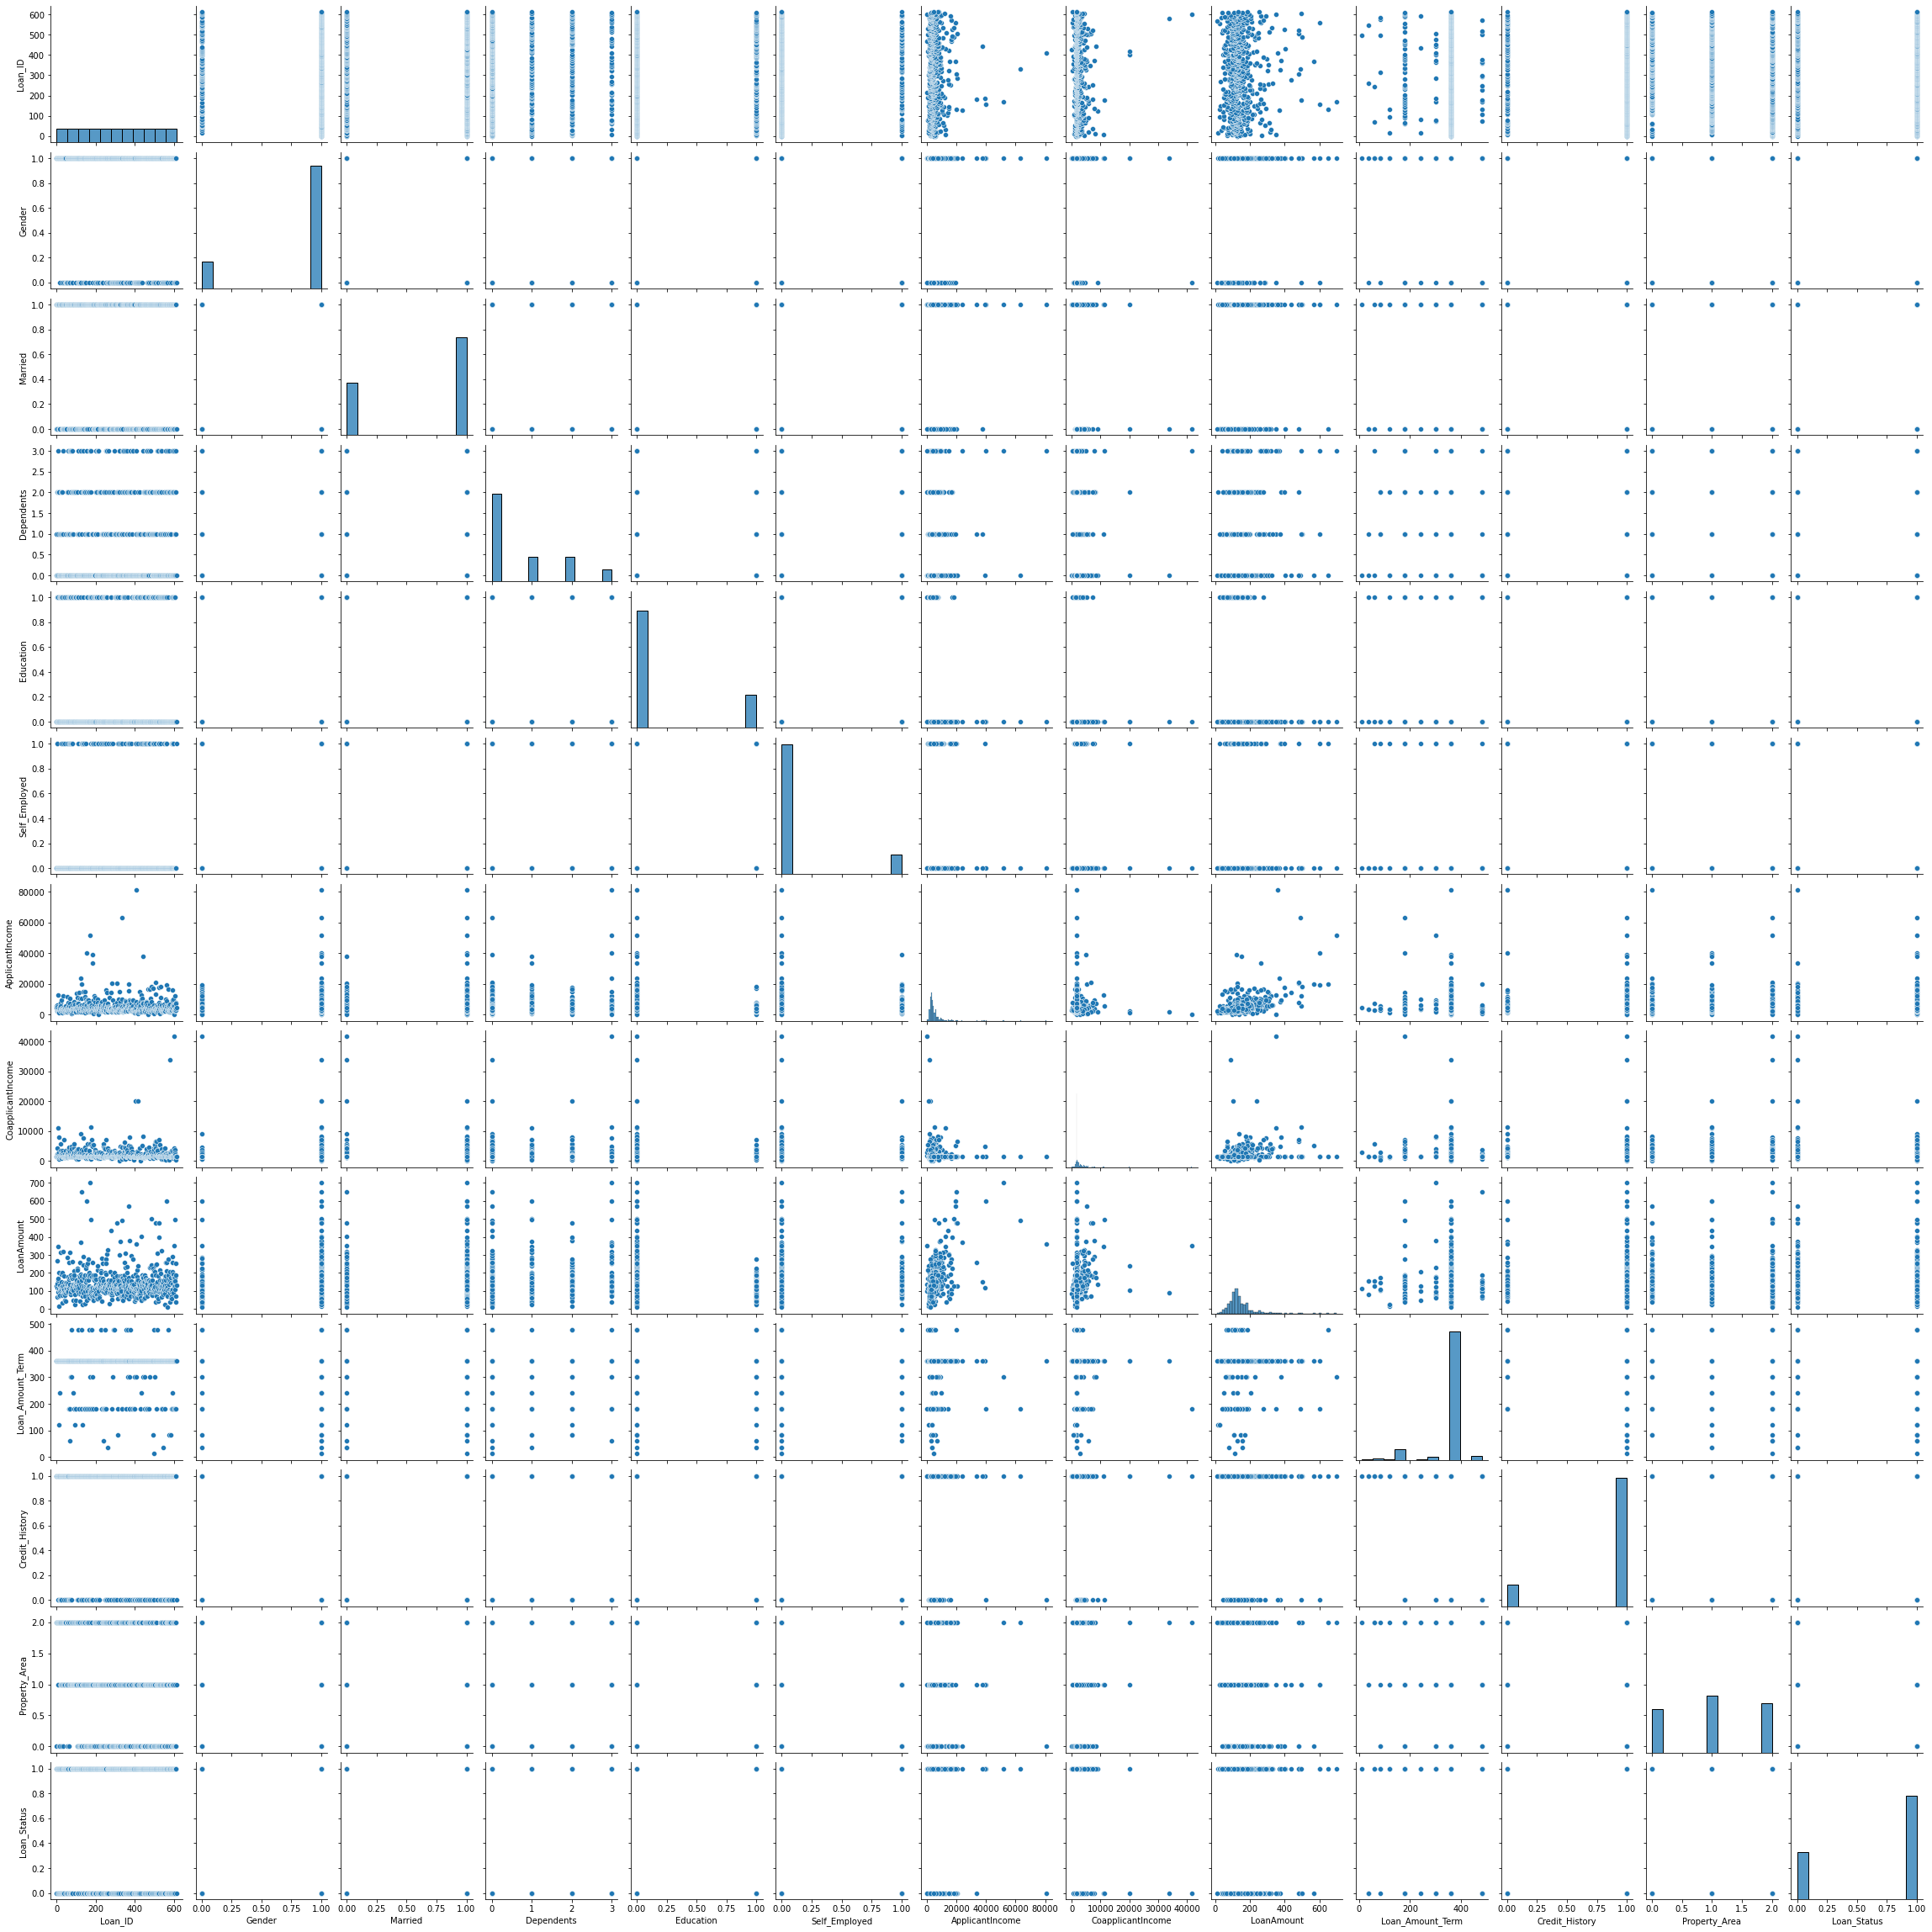

In [43]:
sns.pairplot(df)
plt.show()

###### Descriptive Statistics

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,614.0,306.500000,177.390811,0.000000,153.250000,306.500000,459.75,613.0
Gender,614.0,0.817590,0.386497,0.000000,1.000000,1.000000,1.00,1.0
Married,614.0,0.653094,0.476373,0.000000,0.000000,1.000000,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.000000,0.000000,0.000000,1.00,3.0
Education,614.0,0.218241,0.413389,0.000000,0.000000,0.000000,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.000000,0.000000,0.000000,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.00,81000.0
CoapplicantIncome,614.0,2342.092871,2621.427966,16.120001,1621.245798,1621.245798,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.000000,100.250000,128.000000,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.000000,360.000000,360.000000,360.00,480.0


#### As we can see in the above chart attributes- Loan_Amount_Term,Gender,Married,Credit_History and Loan_Status have more median than their respective mean,which indicates that data might skewed left hand side as well and also the interquartile difference for ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term are varying too much hence there might be possibility that outliers are present in the data set.

Note.I'm not going to apply statistical properties over any of the categorical columns.

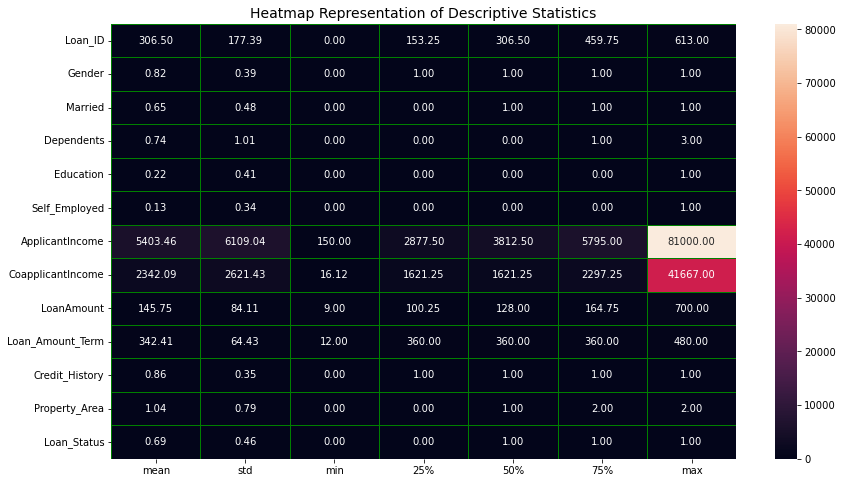

In [45]:
plt.figure(figsize=(14,8))
sns.heatmap(df.describe()[1:].T,annot=True,linecolor='Green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

###### Correlation

In [46]:
df.corr().Loan_Status.sort_values()

CoapplicantIncome   -0.089189
Education           -0.085884
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

###### See, there are six attributes having negative values and its showing us that there is negative correlation b/w Income (which is our target variable) and other respective Negative attributes.Hence will remove all the negative correlated columns later in data cleaning phase.Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process

The attributes those are giving negative correlation are---CoapplicantIncome,Education,LoanAmount,Loan_Amount_Term,ApplicantIncome and Self_Employed where only CoapplicantIncome,LoanAmount,Loan_Amount_Term and Applicant _Income are the numeric variables which i'll drop from the dataframe while rest are either target variable or categorical one hence will not remove any of these negative correlated columns.

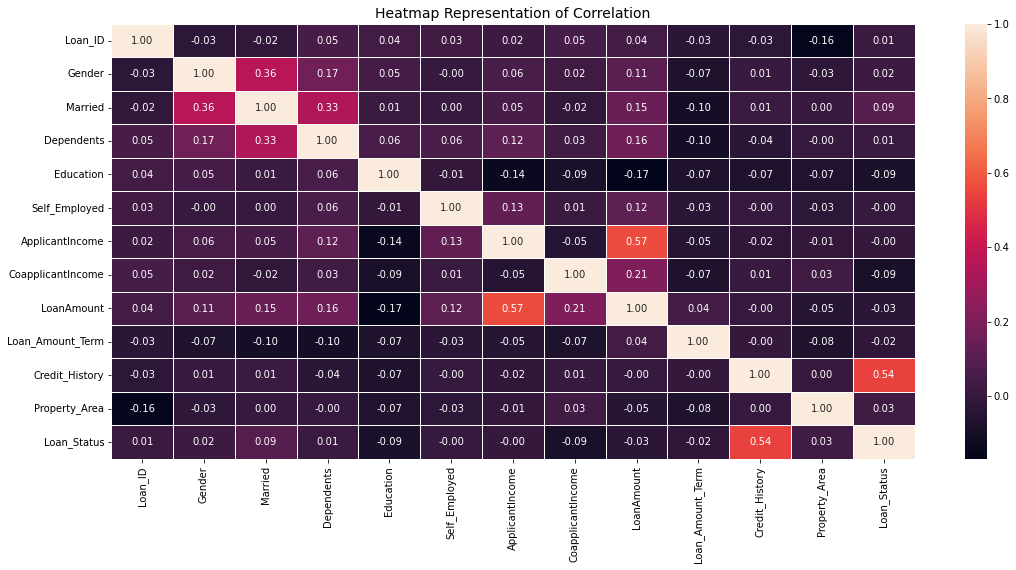

In [47]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

##### Multicollinearity

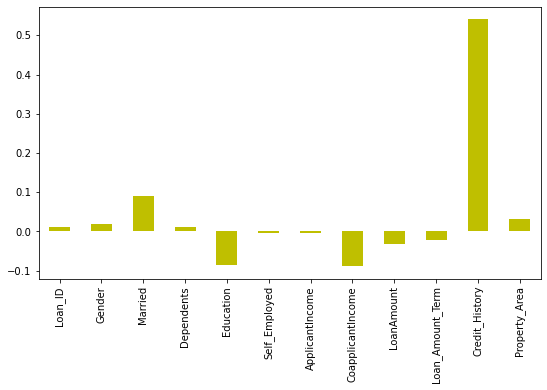

In [48]:
plt.figure(figsize=(9,5))
df.corr().Loan_Status.drop(['Loan_Status']).plot(kind='bar',color='y')
plt.show()

##### Skewness

In [49]:
df.skew().sort_values()

Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Gender              -1.648795
Loan_Status         -0.809998
Married             -0.644850
Property_Area       -0.066196
Loan_ID              0.000000
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.743053
ApplicantIncome      6.539513
CoapplicantIncome    9.677699
dtype: float64

##### The threshold value of Skewness is +/=0.5. Attributes- Property_Area,Loan_ID are only in the range while others are either skewed right or left. will remove skewness from thses columns later on in data cleansing part,also will not touch target column and categorical columns for removing the skewness.

Categorical and Target Column = Gender,Married,Property_Area,Loan_ID,Dependents,Education,Self_Employed,Loan_Status

### Distribution Plot
Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute Loan_ID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


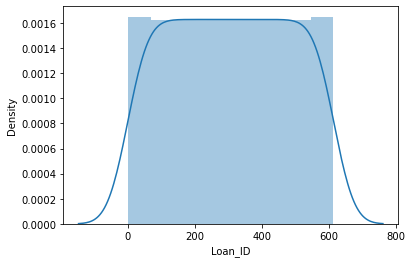



The Distribution Plot for attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


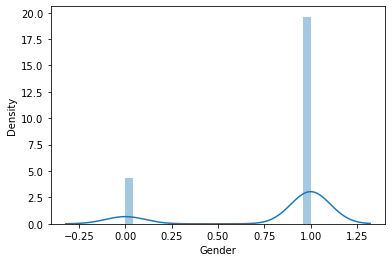



The Distribution Plot for attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


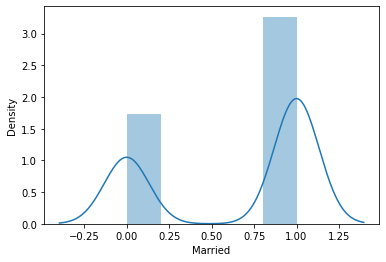



The Distribution Plot for attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


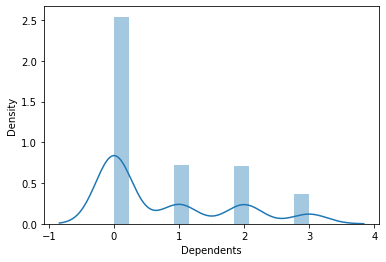



The Distribution Plot for attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


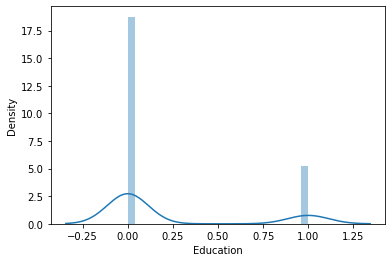



The Distribution Plot for attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


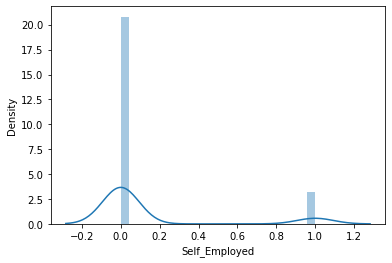



The Distribution Plot for attribute ApplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


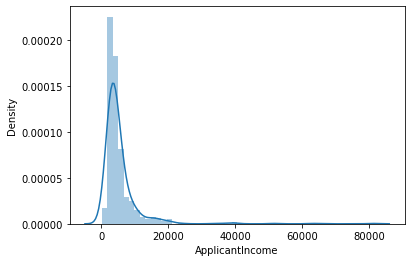



The Distribution Plot for attribute CoapplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


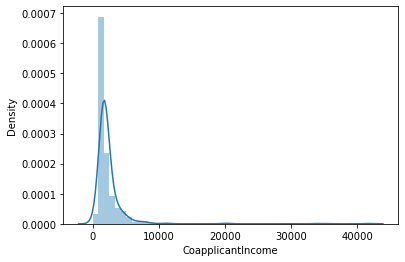



The Distribution Plot for attribute LoanAmount is-
 AxesSubplot(0.125,0.125;0.775x0.755)


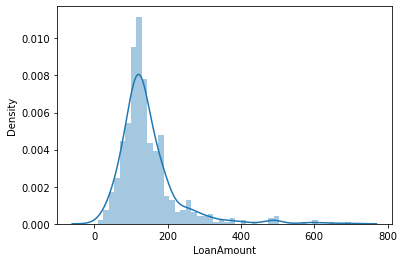



The Distribution Plot for attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


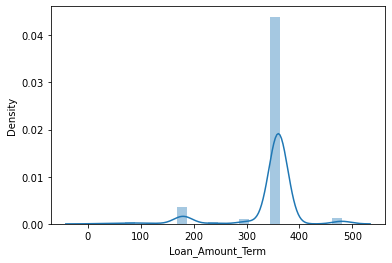



The Distribution Plot for attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


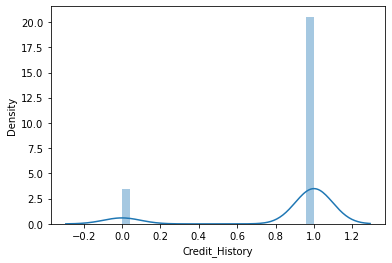



The Distribution Plot for attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


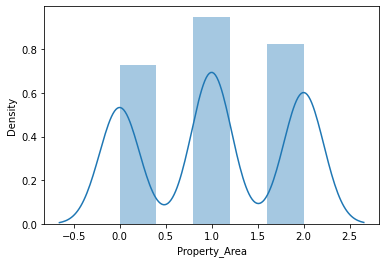



The Distribution Plot for attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


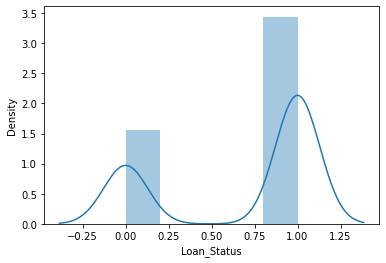

In [50]:
for i in df.columns:
    print(f'The Distribution Plot for attribute {i} is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

###### Outliers

In [51]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
        8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
       dtype=int64))

In [52]:
print(z.iloc[604,8])
print(z.iloc[9,7])
print(z.iloc[94,9])
print(z.iloc[600,7])

4.167692951743534
3.2932204073828855
3.4548579441686273
15.013561442290044


##### Boxplot

The Box-Plot for attribute Loan_ID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


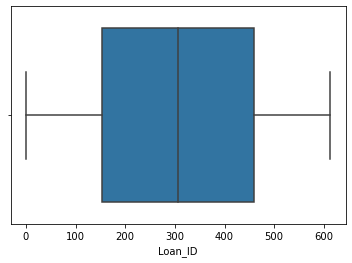



The Box-Plot for attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


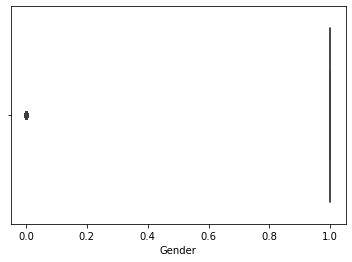



The Box-Plot for attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


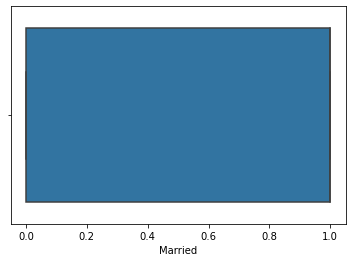



The Box-Plot for attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


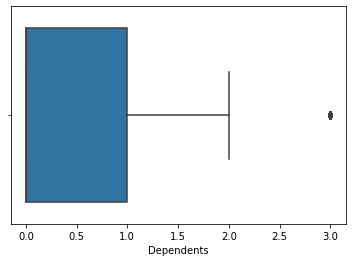



The Box-Plot for attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


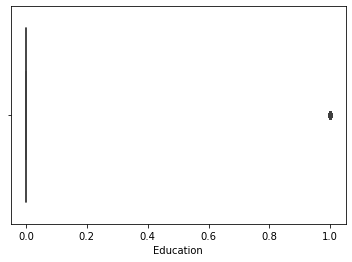



The Box-Plot for attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


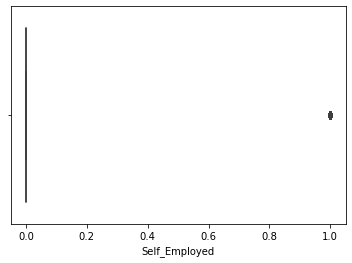



The Box-Plot for attribute ApplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


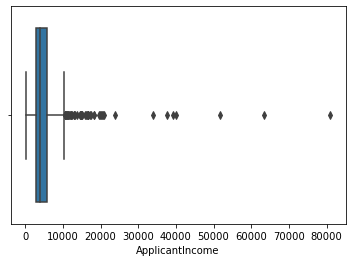



The Box-Plot for attribute CoapplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


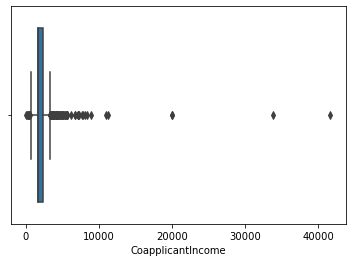



The Box-Plot for attribute LoanAmount is-
 AxesSubplot(0.125,0.125;0.775x0.755)


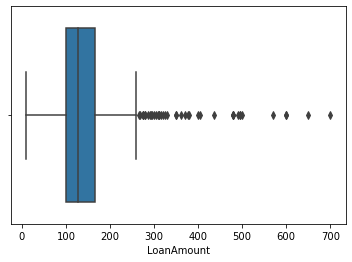



The Box-Plot for attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


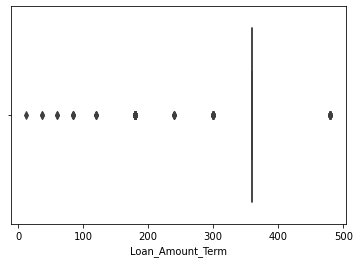



The Box-Plot for attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


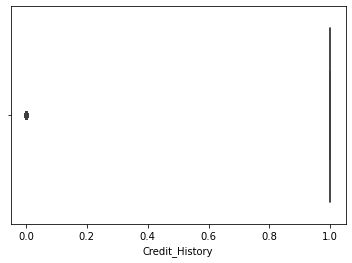



The Box-Plot for attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


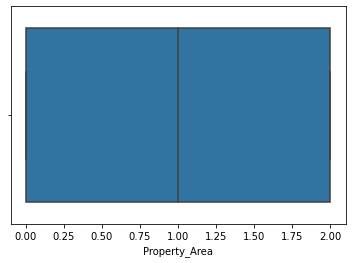



The Box-Plot for attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


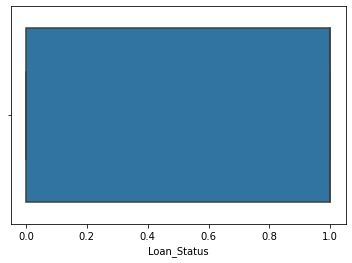

In [53]:
for i in df.columns:
    print(f'The Box-Plot for attribute {i} is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

##### As we can see in the above boxplot images there might be possibility of outliers presence in attributes-Gender, Dependents,Education, Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History and I'll remove the same in next part of data cleansing

Data Cleansing
1. Remove Negative Correlation

In [54]:
df1=df.drop(['CoapplicantIncome','LoanAmount','Loan_Amount_Term','ApplicantIncome'],axis=1)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1.0,2,1
1,1,1,1,1,0,0,1.0,0,0
2,2,1,1,0,0,1,1.0,2,1
3,3,1,1,0,1,0,1.0,2,1
4,4,1,0,0,0,0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0,1
610,610,1,1,3,0,0,1.0,0,1
611,611,1,1,1,0,0,1.0,2,1
612,612,1,1,2,0,0,1.0,2,1


###### Removing Multicollinearity

In [55]:
x=df1.iloc[:,0:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0,1,0,0,0,0,1.0,2
1,1,1,1,1,0,0,1.0,0
2,2,1,1,0,0,1,1.0,2
3,3,1,1,0,1,0,1.0,2
4,4,1,0,0,0,0,1.0,2
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0
610,610,1,1,3,0,0,1.0,0
611,611,1,1,1,0,0,1.0,2
612,612,1,1,2,0,0,1.0,2


In [56]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['variance_inflation_factor']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df2)

In [58]:
vif()

         Features  variance_inflation_factor
0         Loan_ID                   3.172826
1          Gender                   5.276171
2         Married                   3.589790
3      Dependents                   1.763280
4       Education                   1.269759
5   Self_Employed                   1.151397
6  Credit_History                   4.594337
7   Property_Area                   2.374522


##### Removing Outliers

In [59]:
df3=df1[(z<3).all(axis=1)]
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1.0,2,1
1,1,1,1,1,0,0,1.0,0,0
2,2,1,1,0,0,1,1.0,2,1
3,3,1,1,0,1,0,1.0,2,1
4,4,1,0,0,0,0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0,1
610,610,1,1,3,0,0,1.0,0,1
611,611,1,1,1,0,0,1.0,2,1
612,612,1,1,2,0,0,1.0,2,1


In [60]:
print(df1.shape)
print(df3.shape)

(614, 9)
(577, 9)


In [61]:
percentage_loss=(614-577)*100/614
percentage_loss

6.026058631921824

###### since the threshold value I'm considering for the outliers is 10% but I'm getting here 6% which is ofcourse good since I've still 577 rows which i think a enough data and it will work good if i even consider the outliers removal,hence will remove the outliers

#### Removing Skewness

In [62]:
df3.skew().sort_values()

Credit_History   -1.976043
Gender           -1.622920
Loan_Status      -0.822635
Married          -0.630211
Property_Area    -0.055332
Loan_ID           0.010879
Dependents        1.052106
Education         1.306588
Self_Employed     2.252848
dtype: float64

##### Using np.sqrt method to remove Skewness

In [63]:
df3['Credit_History']=np.sqrt(df3['Credit_History'])
df3['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 577, dtype: float64

In [64]:
df3['Credit_History'].isnull().sum()

0

In [65]:
df3.skew().sort_values()

Credit_History   -1.976043
Gender           -1.622920
Loan_Status      -0.822635
Married          -0.630211
Property_Area    -0.055332
Loan_ID           0.010879
Dependents        1.052106
Education         1.306588
Self_Employed     2.252848
dtype: float64

###### Using Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [67]:
x=df3.iloc[:,0:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0,1,0,0,0,0,1.0,2
1,1,1,1,1,0,0,1.0,0
2,2,1,1,0,0,1,1.0,2
3,3,1,1,0,1,0,1.0,2
4,4,1,0,0,0,0,1.0,2
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0
610,610,1,1,3,0,0,1.0,0
611,611,1,1,1,0,0,1.0,2
612,612,1,1,2,0,0,1.0,2


In [68]:
x=sc.fit_transform(x)
x

array([[-1.72210857,  0.47713685, -1.36251079, ..., -0.38058018,
         0.41851254,  1.22747207],
       [-1.71644519,  0.47713685,  0.73393914, ..., -0.38058018,
         0.41851254, -1.30652215],
       [-1.71078181,  0.47713685,  0.73393914, ...,  2.62756724,
         0.41851254,  1.22747207],
       ...,
       [ 1.73821533,  0.47713685,  0.73393914, ..., -0.38058018,
         0.41851254,  1.22747207],
       [ 1.74387871,  0.47713685,  0.73393914, ..., -0.38058018,
         0.41851254,  1.22747207],
       [ 1.74954209, -2.09583477, -1.36251079, ...,  2.62756724,
        -2.38941464, -0.03952504]])

Mean is= -9.62065012673446e-18
Standard_Deviation= 1.0


AxesSubplot(0.125,0.125;0.775x0.755)


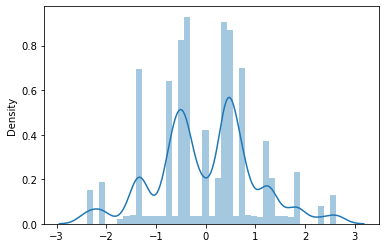

In [69]:
print('Mean is=',x.mean())
print('Standard_Deviation=',x.std())
print('\n')
print(sns.distplot(x))
plt.show()

##### PCA

In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x)
x_pca

array([[ 1.19015251, -2.05827393,  0.33414942],
       [-0.75392505, -0.83915176, -0.67964668],
       [-0.18257696, -1.72587216, -0.29870266],
       ...,
       [-0.82911018, -0.15869124, -0.44593247],
       [-1.3584348 , -0.10030269, -0.4006589 ],
       [ 2.31210653,  2.41432881,  0.81225698]])

In [71]:
x=x_pca
x

array([[ 1.19015251, -2.05827393,  0.33414942],
       [-0.75392505, -0.83915176, -0.67964668],
       [-0.18257696, -1.72587216, -0.29870266],
       ...,
       [-0.82911018, -0.15869124, -0.44593247],
       [-1.3584348 , -0.10030269, -0.4006589 ],
       [ 2.31210653,  2.41432881,  0.81225698]])

In [72]:
y=df3['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

##### Plotting the Relationship b/w Principle Components

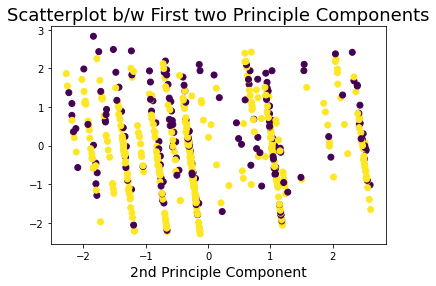

In [73]:
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('1st Principle Component',fontsize=14)
plt.xlabel('2nd Principle Component',fontsize=14)
plt.title('Scatterplot b/w First two Principle Components',fontsize=18)
plt.show()

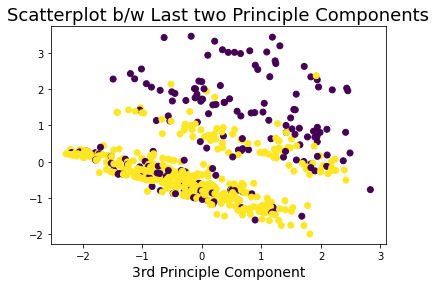

In [74]:
plt.scatter(x[:,1:2],x[:,2:3],c=y)
plt.xlabel('2nd Principle Component',fontsize=14)
plt.xlabel('3rd Principle Component',fontsize=14)
plt.title('Scatterplot b/w Last two Principle Components',fontsize=18)
plt.show()

In [75]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

##### Using IMBlearn Balancing Techniques

In [76]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [77]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [78]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [79]:
print(x.shape)
print(y.shape)

(796, 3)
(796,)


#### Training_Testing Phase
I am going to train 80% of the data and testing size would be 20%
first will try to find out the best value for random_state

In [80]:
#importing machine learning libraries for Classification model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()

In [81]:
#finding out the best random_state 
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    if accuracy_score(pred_train,y_train)==accuracy_score(pred_test,y_test):
        print(f'At random_state-{i} The Logistic Regression Model performs really well')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\t {Confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\t {classification_report(pred_test,y_test)}')
        print('\n')
    else:
        print(f'At random_state-{i} The Training and Testing Accuracy of the model is different')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')
        print('\n')     

At random_state-0 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.6808176100628931
Testing accuracy of the model is	 0.7
Confusion Matrix for the model is
 [[48 23]
 [25 64]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.66      0.68      0.67        71
           1       0.74      0.72      0.73        89

    accuracy                           0.70       160
   macro avg       0.70      0.70      0.70       160
weighted avg       0.70      0.70      0.70       160



At random_state-1 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.6761006289308176
Testing accuracy of the model is	 0.71875
Confusion Matrix for the model is
 [[51 17]
 [28 64]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.65      0.75      0.69        68
           1       0.79      0

In [82]:
#choosing random_state as 49

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=49)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(f'At random_state-{i} The Training and Testing Accuracy of the model is almost same')
print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')

At random_state-49 The Training and Testing Accuracy of the model is almost same
Training accuracy of the model is	 0.6823899371069182
Testing accuracy of the model is	 0.69375
Confusion Matrix for the model is
 [[55 20]
 [29 56]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        75
           1       0.74      0.66      0.70        85

    accuracy                           0.69       160
   macro avg       0.70      0.70      0.69       160
weighted avg       0.70      0.69      0.69       160



##### At random_state 49 I'm getting almost equal training and testing accuracy score and equal f1-score too,which indicates model is performing well and now let's try few more models so that we can make a strong prediction going forward

##### Finding Out CV Score

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
for i in range(2,12):
    cvs=cross_val_score(lr,x,y,cv=i)
    mean=cvs.mean()
    std=cvs.std()
    print(f'At K-Fold {i} the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.5753768844221105 and standard deviation is 0.03768844221105527

At K-Fold 3 the CV Score of the logistic model is 0.6483141816806167 and standard deviation is 0.04569721530060577

At K-Fold 4 the CV Score of the logistic model is 0.6683417085427136 and standard deviation is 0.029301265803242688

At K-Fold 5 the CV Score of the logistic model is 0.6721540880503144 and standard deviation is 0.023982002963072166

At K-Fold 6 the CV Score of the logistic model is 0.6808688387635756 and standard deviation is 0.029472403675292816

At K-Fold 7 the CV Score of the logistic model is 0.6833788009847627 and standard deviation is 0.029723161122109192

At K-Fold 8 the CV Score of the logistic model is 0.6833838383838383 and standard deviation is 0.03649618099782184

At K-Fold 9 the CV Score of the logistic model is 0.682144478492793 and standard deviation is 0.02995523756728179

At K-Fold 10 the CV Score of the logistic model is 0.6846835443037975

In [85]:
cvs=cross_val_score(lr,x,y,cv=11)
mean=cvs.mean()
std=cvs.std()
print(f'At K-Fold 11 the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 11 the CV Score of the logistic model is 0.6821468105714682 and standard deviation is 0.04088654282251096



##### At each K-Fold I'm getting the same CV score which means model is very geniune and behaving well at each stages of training.Now lets try CV score for all other models

In [86]:
#importing other models of classification

from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
mb=MultinomialNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svm=SVC()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
sgd=SGDClassifier()

In [87]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print(f'For model {algorithm}')
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n Classification Report-\n',classification_report(y_test,pred_test_y))
    print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test_y))
    print('\n\nAUC_ROC CURVE')
    prob=algorithm.predict_proba(x_test)[:,1]
    FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC_Curve for the model {algorithm}')
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,pred_test_y)
    print('ROC AUC SCORE is-',ROC_AUC_SCORE)
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for l in range(2,8):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

For model LogisticRegression()
Training_Accuracy_Score= 0.7012578616352201
Testing_Accuracy_Score= 0.61875

 Classification Report-
               precision    recall  f1-score   support

           0       0.69      0.59      0.63        90
           1       0.55      0.66      0.60        70

    accuracy                           0.62       160
   macro avg       0.62      0.62      0.62       160
weighted avg       0.63      0.62      0.62       160


 Confusion Metrix-
 [[53 37]
 [24 46]]


AUC_ROC CURVE


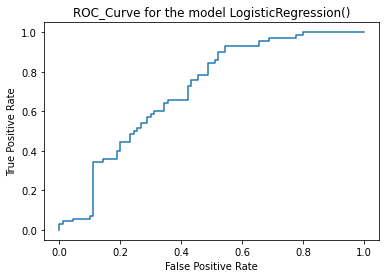

ROC AUC SCORE is- 0.623015873015873


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.5753768844221105


At the K-Fold 3 the CV score of model LogisticRegression() is 0.6483141816806167


At the K-Fold 4 the CV score of model LogisticRegression() is 0.6683417085427136


At the K-Fold 5 the CV score of model LogisticRegression() is 0.6721540880503144


At the K-Fold 6 the CV score of model LogisticRegression() is 0.6808688387635756


At the K-Fold 7 the CV score of model LogisticRegression() is 0.6833788009847627




In [88]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.6965408805031447
Testing_Accuracy_Score= 0.63125

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.50      0.60        90
           1       0.55      0.80      0.65        70

    accuracy                           0.63       160
   macro avg       0.66      0.65      0.63       160
weighted avg       0.67      0.63      0.63       160


 Confusion Metrix-
 [[45 45]
 [14 56]]


AUC_ROC CURVE


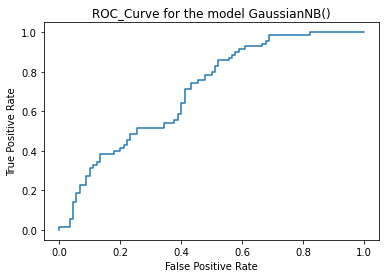

ROC AUC SCORE is- 0.65


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.5640703517587939


At the K-Fold 3 the CV score of model GaussianNB() is 0.5992812219227313


At the K-Fold 4 the CV score of model GaussianNB() is 0.6331658291457286


At the K-Fold 5 the CV score of model GaussianNB() is 0.6520361635220125


At the K-Fold 6 the CV score of model GaussianNB() is 0.6506227690438217


At the K-Fold 7 the CV score of model GaussianNB() is 0.6593696630957926




In [89]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.8553459119496856
Testing_Accuracy_Score= 0.73125

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.68      0.74        90
           1       0.66      0.80      0.72        70

    accuracy                           0.73       160
   macro avg       0.74      0.74      0.73       160
weighted avg       0.75      0.73      0.73       160


 Confusion Metrix-
 [[61 29]
 [14 56]]


AUC_ROC CURVE


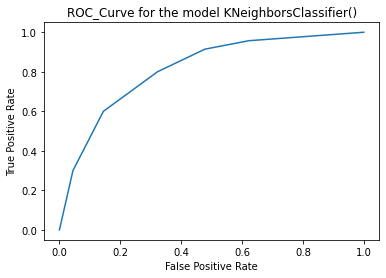

ROC AUC SCORE is- 0.738888888888889


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.6218592964824121


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.6470090320139973


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.6733668341708543


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.6670833333333333


At the K-Fold 6 the CV score of model KNeighborsClassifier() is 0.6834890255942888


At the K-Fold 7 the CV score of model KNeighborsClassifier() is 0.7047707764987691




In [90]:
model(neighbor,x,y)

For model DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.70625

 Classification Report-
               precision    recall  f1-score   support

           0       0.77      0.68      0.72        90
           1       0.64      0.74      0.69        70

    accuracy                           0.71       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.72      0.71      0.71       160


 Confusion Metrix-
 [[61 29]
 [18 52]]


AUC_ROC CURVE


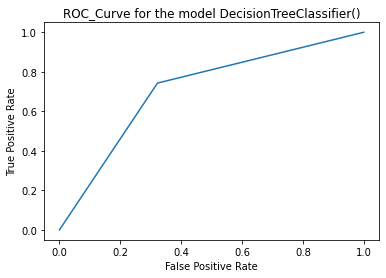

ROC AUC SCORE is- 0.7103174603174603


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.5577889447236181


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.5930202865654702


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.6306532663316583


At the K-Fold 5 the CV score of model DecisionTreeClassifier() is 0.663317610062893


At the K-Fold 6 the CV score of model DecisionTreeClassifier() is 0.6783815599605073


At the K-Fold 7 the CV score of model DecisionTreeClassifier() is 0.6670437154833987




In [91]:
model(dtc,x,y)

For model RandomForestClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.76875

 Classification Report-
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        90
           1       0.70      0.81      0.75        70

    accuracy                           0.77       160
   macro avg       0.77      0.77      0.77       160
weighted avg       0.78      0.77      0.77       160


 Confusion Metrix-
 [[66 24]
 [13 57]]


AUC_ROC CURVE


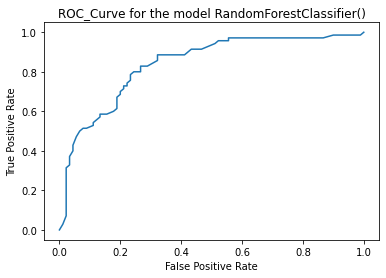

ROC AUC SCORE is- 0.7738095238095238


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.5640703517587939


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.5968033290774105


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.635678391959799


At the K-Fold 5 the CV score of model RandomForestClassifier() is 0.6708254716981132


At the K-Fold 6 the CV score of model RandomForestClassifier() is 0.685985797827903


At the K-Fold 7 the CV score of model RandomForestClassifier() is 0.7161487790272141




In [92]:
model(rfc,x,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.7830188679245284
Testing_Accuracy_Score= 0.63125

 Classification Report-
               precision    recall  f1-score   support

           0       0.72      0.56      0.63        90
           1       0.56      0.73      0.63        70

    accuracy                           0.63       160
   macro avg       0.64      0.64      0.63       160
weighted avg       0.65      0.63      0.63       160


 Confusion Metrix-
 [[50 40]
 [19 51]]


AUC_ROC CURVE


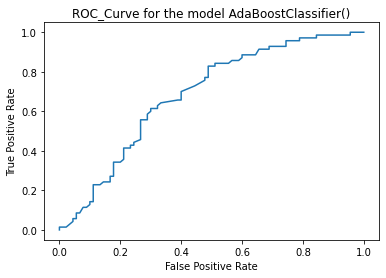

ROC AUC SCORE is- 0.642063492063492


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.5690954773869347


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.5528207310729654


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.5829145728643216


At the K-Fold 5 the CV score of model AdaBoostClassifier() is 0.6282704402515724


At the K-Fold 6 the CV score of model AdaBoostClassifier() is 0.6269366598313968


At the K-Fold 7 the CV score of model AdaBoostClassifier() is 0.6608224100073192




In [93]:
model(ad,x,y)

For model GradientBoostingClassifier()
Training_Accuracy_Score= 0.8930817610062893
Testing_Accuracy_Score= 0.725

 Classification Report-
               precision    recall  f1-score   support

           0       0.83      0.64      0.73        90
           1       0.64      0.83      0.73        70

    accuracy                           0.73       160
   macro avg       0.74      0.74      0.73       160
weighted avg       0.75      0.73      0.73       160


 Confusion Metrix-
 [[58 32]
 [12 58]]


AUC_ROC CURVE


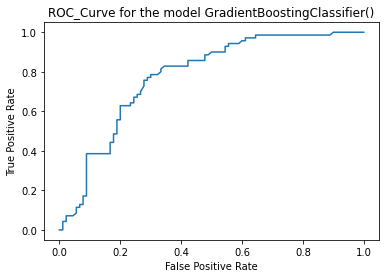

ROC AUC SCORE is- 0.7365079365079366


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.5552763819095478


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.601834775618291


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.6218592964824121


At the K-Fold 5 the CV score of model GradientBoostingClassifier() is 0.6420911949685534


At the K-Fold 6 the CV score of model GradientBoostingClassifier() is 0.6294714057871953


At the K-Fold 7 the CV score of model GradientBoostingClassifier() is 0.6671324328520416




In [94]:
model(grd,x,y)

##### Hyper Parameter Tuning
To make the model more accurate by providing their best parameters

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
#defining all the parameters of the respective models
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [97]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [98]:
HPT(neighbor,Parameter_neighbor)

The best Parameters of the model KNeighborsClassifier() is {'algorithm': 'auto', 'weights': 'distance'}


In [99]:
HPT(dtc,Parameter_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}


In [100]:
HPT(rfc,Parameter_rfc)

The best Parameters of the model RandomForestClassifier() is {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': None}


In [101]:
HPT(ad,Parameter_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME'}


In [102]:
HPT(grd,Parameter_grd)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'squared_error', 'loss': 'exponential', 'max_features': 'log2'}


In [103]:
#Redefining the models after getting the parameters
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='uniform')
dtc=DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='random')
rfc=RandomForestClassifier(class_weight= 'balanced',criterion='entropy',max_features='sqrt')
ad=AdaBoostClassifier(algorithm= 'SAMME')
grd=GradientBoostingClassifier(criterion='squared_error',loss= 'exponential',max_features= 'sqrt')

For model LogisticRegression()
Training_Accuracy_Score= 0.7012578616352201
Testing_Accuracy_Score= 0.61875

 Classification Report-
               precision    recall  f1-score   support

           0       0.69      0.59      0.63        90
           1       0.55      0.66      0.60        70

    accuracy                           0.62       160
   macro avg       0.62      0.62      0.62       160
weighted avg       0.63      0.62      0.62       160


 Confusion Metrix-
 [[53 37]
 [24 46]]


AUC_ROC CURVE


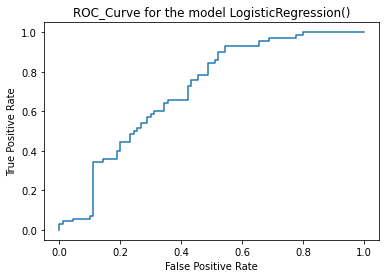

ROC AUC SCORE is- 0.623015873015873


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.5753768844221105


At the K-Fold 3 the CV score of model LogisticRegression() is 0.6483141816806167


At the K-Fold 4 the CV score of model LogisticRegression() is 0.6683417085427136


At the K-Fold 5 the CV score of model LogisticRegression() is 0.6721540880503144


At the K-Fold 6 the CV score of model LogisticRegression() is 0.6808688387635756


At the K-Fold 7 the CV score of model LogisticRegression() is 0.6833788009847627




In [104]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.6965408805031447
Testing_Accuracy_Score= 0.63125

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.50      0.60        90
           1       0.55      0.80      0.65        70

    accuracy                           0.63       160
   macro avg       0.66      0.65      0.63       160
weighted avg       0.67      0.63      0.63       160


 Confusion Metrix-
 [[45 45]
 [14 56]]


AUC_ROC CURVE


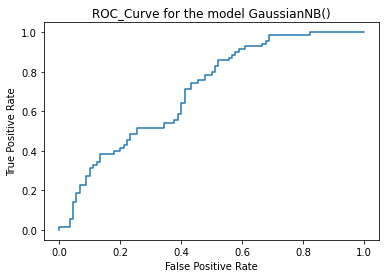

ROC AUC SCORE is- 0.65


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.5640703517587939


At the K-Fold 3 the CV score of model GaussianNB() is 0.5992812219227313


At the K-Fold 4 the CV score of model GaussianNB() is 0.6331658291457286


At the K-Fold 5 the CV score of model GaussianNB() is 0.6520361635220125


At the K-Fold 6 the CV score of model GaussianNB() is 0.6506227690438217


At the K-Fold 7 the CV score of model GaussianNB() is 0.6593696630957926




In [105]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.8553459119496856
Testing_Accuracy_Score= 0.73125

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.68      0.74        90
           1       0.66      0.80      0.72        70

    accuracy                           0.73       160
   macro avg       0.74      0.74      0.73       160
weighted avg       0.75      0.73      0.73       160


 Confusion Metrix-
 [[61 29]
 [14 56]]


AUC_ROC CURVE


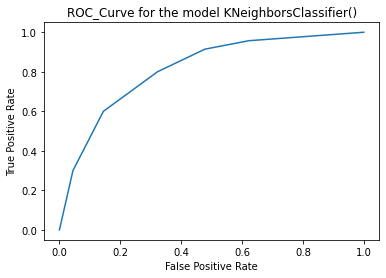

ROC AUC SCORE is- 0.738888888888889


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.6218592964824121


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.6470090320139973


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.6733668341708543


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.6670833333333333


At the K-Fold 6 the CV score of model KNeighborsClassifier() is 0.6834890255942888


At the K-Fold 7 the CV score of model KNeighborsClassifier() is 0.7047707764987691




In [106]:
model(neighbor,x,y)

For model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.7375

 Classification Report-
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        90
           1       0.68      0.74      0.71        70

    accuracy                           0.74       160
   macro avg       0.73      0.74      0.74       160
weighted avg       0.74      0.74      0.74       160


 Confusion Metrix-
 [[66 24]
 [18 52]]


AUC_ROC CURVE


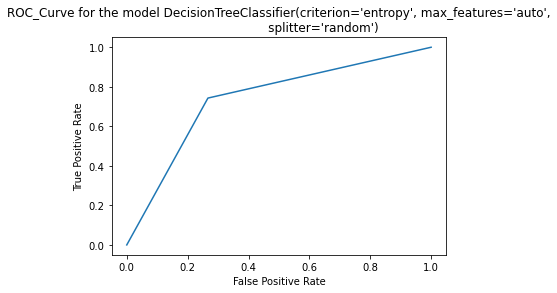

ROC AUC SCORE is- 0.7380952380952381


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5339195979899498


At the K-Fold 3 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5641225705773869


At the K-Fold 4 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.6005025125628141


At the K-Fold 5 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.6142767295597484


At the K-Fold 6 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5967760309865574


At the K-Fold 7 the CV score of model DecisionTreeClassifier(criterion='entropy

In [107]:
model(dtc,x,y)

For model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.74375

 Classification Report-
               precision    recall  f1-score   support

           0       0.83      0.69      0.75        90
           1       0.67      0.81      0.74        70

    accuracy                           0.74       160
   macro avg       0.75      0.75      0.74       160
weighted avg       0.76      0.74      0.74       160


 Confusion Metrix-
 [[62 28]
 [13 57]]


AUC_ROC CURVE


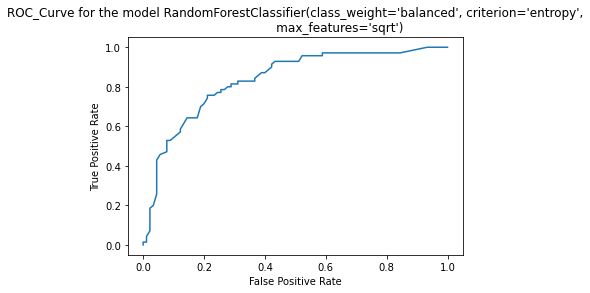

ROC AUC SCORE is- 0.7515873015873016


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.5716080402010051


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.5992859507258713


At the K-Fold 4 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.6344221105527639


At the K-Fold 5 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.6620518867924529


At the K-Fold 6 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.6809163059163059


At the K-Fold 7 the CV score of model RandomFores

In [108]:
model(rfc,x,y)

For model AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.7452830188679245
Testing_Accuracy_Score= 0.6375

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.53      0.62        90
           1       0.56      0.77      0.65        70

    accuracy                           0.64       160
   macro avg       0.66      0.65      0.64       160
weighted avg       0.67      0.64      0.64       160


 Confusion Metrix-
 [[48 42]
 [16 54]]


AUC_ROC CURVE


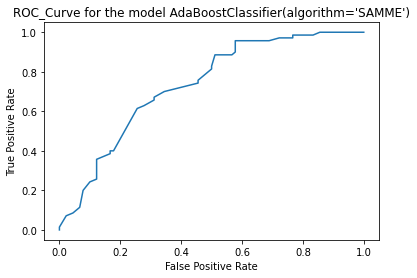

ROC AUC SCORE is- 0.6523809523809524


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5364321608040201


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5728897715988084


At the K-Fold 4 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6130653266331659


At the K-Fold 5 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6458647798742139


At the K-Fold 6 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6732835877572718


At the K-Fold 7 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6858074389513605




In [109]:
model(ad,x,y)

For model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt')
Training_Accuracy_Score= 0.839622641509434
Testing_Accuracy_Score= 0.6625

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.58      0.66        90
           1       0.59      0.77      0.67        70

    accuracy                           0.66       160
   macro avg       0.68      0.67      0.66       160
weighted avg       0.69      0.66      0.66       160


 Confusion Metrix-
 [[52 38]
 [16 54]]


AUC_ROC CURVE


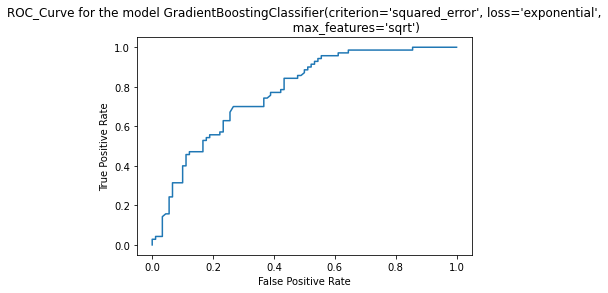

ROC AUC SCORE is- 0.6746031746031746


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.5653266331658291


At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.59304393058117


At the K-Fold 4 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.6432160804020101


At the K-Fold 5 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.6483569182389937


At the K-Fold 6 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.6508411179463812


At the

In [110]:
model(grd,x,y)

###### DecisionTreeClassifier model seems perfect as compare to other models as the training accuracy is almost 100% while testing accuracy and CV score is 76% which is good enough.Also the CV score and testing accuracy are same it's also indicates that our model is performing excellent by each method either random_state or K-Fold method.The F1-score is 76% too it means that error are on lower side and ROC_AUC_SCORE is 0.76,which is greater than the threshold value of 0.6, which indicates that the machine probability is good while predicting 1 as 1 and 0 as 0.

###### Saving the best model

In [111]:
import joblib

In [112]:
file='loan_status.obj'
joblib.dump(dtc,file)

['loan_status.obj']

In [113]:
a=joblib.load('loan_status.obj')
a

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random')

In [114]:
pred=a.predict(x_test)
pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1])

In [115]:
#Testing Accuracy of DecisionTreeClassifier Model
Accuracy_score=(accuracy_score(pred,y_test))*100
Accuracy_score

95.0

##### Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.9511278195488723


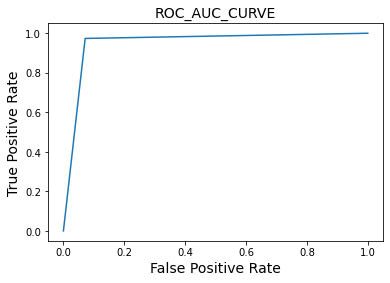

In [117]:
prob=a.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,pred)}')

###### Conclusion

In [118]:
conclusion=pd.DataFrame(data=([pred,y_test]),index=['Predicted Loan_Status','Original Loan_Status'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted Loan_Status,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
Original Loan_Status,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


##### When I deployed our DecisionTreeClassifier Model to the y_test data what i found is that the testing accuracy of the model went to almost 96% which is excellent accuracy for predicting any target variable correctly.Also the ROC AUC Score is 0.96 which is greater than 0.6 of threshold value and it indicates that out of 100 times,96 times model is predicting the right classes i.e. 1 as 1 and 0 as 0 and this is still a great accuracy. As we can see in the conclusion portion we have got almost same value in predicted Loan_Status as compare to original Loan_Status. So we can say that this model has great accuracy while predicting the Loan_Status of the applicants